# Required Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder

# Extracting Data Using API

In [ ]:
import requests

url = "https://moviedatabase8.p.rapidapi.com/Search/Aven"

headers = {
	"x-rapidapi-key": "455c6d278bmsh12887f712f33afdp1c44fcjsn074edc4c37a8",
	"x-rapidapi-host": "moviedatabase8.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

print(response.json())

[{'_id': '65ef3f30675dde8010852dd3', 'id': 299534, 'title': 'Avengers: Endgame', 'vote_average': 8.263, 'vote_count': 23857, 'status': 'Released', 'release_date': '2019-04-24T00:00:00.000Z', 'revenue': 2800000000, 'runtime': 181, 'adult': False, 'backdrop_path': '/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg', 'budget': 356000000, 'homepage': 'https://www.marvel.com/movies/avengers-endgame', 'imdb_id': 'tt4154796', 'original_language': 'en', 'original_title': 'Avengers: Endgame', 'overview': "After the devastating events of Avengers: Infinity War, the universe is in ruins due to the efforts of the Mad Titan, Thanos. With the help of remaining allies, the Avengers must assemble once more in order to undo Thanos' actions and restore order to the universe once and for all, no matter what consequences may be in store.", 'popularity': 91.756, 'poster_path': 'https://image.tmdb.org/t/p/original//or06FN3Dka5tukK1e9sl16pB3iy.jpg', 'tagline': 'Avenge the fallen.', 'genres': 'Adventure, Science Fiction, Acti

In [ ]:
import requests

url = "https://moviedatabase8.p.rapidapi.com/Search/Incep"

headers = {
	"x-rapidapi-key": "b47ef8527cmshf456894e006257cp1bd87cjsn3f1c59a6141d",
	"x-rapidapi-host": "moviedatabase8.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

print(response.json())

{'message': 'You have exceeded the DAILY quota for Requests on your current plan, BASIC. Upgrade your plan at https://rapidapi.com/dolphinnoirbusiness/api/moviedatabase8'}


In [ ]:
from re import search
#Retrieving the data through API

import requests
import string

imdb_ratings_api_1 = pd.DataFrame()

search_chars = string.ascii_uppercase + string.digits


for start_char_search in search_chars[20:]:

    url = f"https://moviedatabase8.p.rapidapi.com/Search/{start_char_search}"

    # headers = {
    #   "x-rapidapi-key": "455c6d278bmsh12887f712f33afdp1c44fcjsn074edc4c37a8",
    #   "x-rapidapi-host": "moviedatabase8.p.rapidapi.com"
    # } #diku8237@colorado.edu

  #   headers = {
	# "x-rapidapi-key": "b47ef8527cmshf456894e006257cp1bd87cjsn3f1c59a6141d",
	# "x-rapidapi-host": "moviedatabase8.p.rapidapi.com"
  #   } #kuntamalladivyasree
    headers = {
	"x-rapidapi-key": "8c8168a35emshcdf9135e0108c6ap1bd202jsnc9fb222bdb20",
	"x-rapidapi-host": "moviedatabase8.p.rapidapi.com"
}

    response = requests.get(url, headers=headers)

    imdb_ratings_api_1 = pd.concat([imdb_ratings_api_1,pd.DataFrame(response.json())])


In [ ]:
imdb_ratings_api_1.shape

(200, 24)

In [ ]:
set(imdb_ratings_api_1['title'].values)

{'10 Cloverfield Lane',
 '10,000 BC',
 '101 Dalmatians',
 '102 Dalmatians',
 '12 Years a Slave',
 '13 Going on 30',
 '17 Again',
 '21 Jump Street',
 '30 Days of Night',
 '300: Rise of an Empire',
 '40 Days and 40 Nights',
 '50 First Dates',
 'A Day in The Life of George',
 'Adventures in Bora Bora',
 'Alice in Wonderland',
 'Apollo 13',
 'Aquaman',
 'Around the World in 80 Days',
 'Avatar',
 'Avatar: The Way of Water',
 'Avengers: Age of Ultron',
 'Avengers: Endgame',
 'Avengers: Infinity War',
 'Batman v Superman: Dawn of Justice',
 'Beauty and the Beast',
 'Bee Movie',
 'Black Panther: Wakanda Forever',
 'Blade Runner 2049',
 'Bohemian Rhapsody',
 'Captain America: Civil War',
 'Captain Marvel',
 'Cars 2',
 'Cars 3',
 'Deadpool 2',
 'Despicable Me 2',
 'Despicable Me 3',
 'Detective Chinatown 3',
 'Doctor Strange in the Multiverse of Madness',
 'E.T. the Extra-Terrestrial',
 'Evangelion: 3.0+1.0 Thrice Upon a Time',
 'Fahrenheit 9/11',
 'Fast X',
 'Finding Dory',
 'Frozen',
 'Frozen 

In [ ]:
imdb_ratings_api_1.columns

Index(['_id', 'id', 'title', 'vote_average', 'vote_count', 'status',
       'release_date', 'revenue', 'runtime', 'adult', 'backdrop_path',
       'budget', 'homepage', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres', 'spoken_languages',
       'imdb_id', 'production_companies', 'production_countries'],
      dtype='object')

In [ ]:
imdb_ratings_api_1.head()

_id       id                    title  vote_average  \
0  65ef4200675dde80108dbe5c  1224207  Adventures in Bora Bora         0.000   
1  65ef3f30675dde8010852df0   135397           Jurassic World         6.682   
2  65ef3f30675dde8010852ed3   168259                Furious 7         7.238   
3  65ef3f30675dde8010852f80   361743        Top Gun: Maverick         8.260   
4  65ef3f30675dde8010852ddb    99861  Avengers: Age of Ultron         7.276   

   vote_count    status              release_date     revenue  runtime  adult  \
0           0  Released  2023-08-23T00:00:00.000Z  3000000000        5  False   
1       19414  Released  2015-06-06T00:00:00.000Z  1671537444      124  False   
2        9988  Released  2015-04-01T00:00:00.000Z  1515341399      137  False   
3        7546  Released  2022-05-24T00:00:00.000Z  1488732821      131  False   
4       21754  Released  2015-04-22T00:00:00.000Z  1405403694      141  False   

   ...           original_title  \
0  ...  Adventures in Bora Bora   
1  ...           Jurassic World   
2  ...                Furious 7   
3  ...        Top Gun: Maverick   
4  ...  Avengers: Age of Ultron   

                                            overview popularity  \
0  The adventures in Bora Bora, is an astonishing...      0.000   
1  Twenty-two years after the events of Jurassic ...     54.089   
2  Deckard Shaw seeks revenge against Dominic Tor...     62.276   
3  After more than thirty years of service as one...    126.291   
4  When Tony Stark tries to jumpstart a dormant p...     96.565   

                                         poster_path  \
0  https://image.tmdb.org/t/p/original//hx51R9mVv...   
1  https://image.tmdb.org/t/p/original//A0LZHXUzo...   
2  https://image.tmdb.org/t/p/original//ktofZ9Htr...   
3  https://image.tmdb.org/t/p/original//62HCnUTzi...   
4  https://image.tmdb.org/t/p/original//4ssDuvEDk...   

                                tagline  \
0                             (English)   
1                     The park is open.   
2                   Vengeance hits home   
3  Feel the need... The need for speed.   
4                   A new age has come.   

                                         genres  \
0                                   Horror, War   
1  Action, Adventure, Science Fiction, Thriller   
2                       Action, Thriller, Crime   
3                                 Action, Drama   
4            Action, Adventure, Science Fiction   

                 spoken_languages    imdb_id  \
0                         English        NaN   
1                         English  tt0369610   
2  Arabic, English, Spanish, Thai  tt2820852   
3                         English  tt1745960   
4                         English  tt2395427   

                                production_companies      production_countries  
0                                                NaN                       NaN  
1           Amblin Entertainment, Universal Pictures  United States of America  
2        Original Film, One Race, Universal Pictures  United States of America  
3  Skydance, Don Simpson/Jerry Bruckheimer Films,...  United States of America  
4                                     Marvel Studios  United States of America  

[5 rows x 24 columns]

In [ ]:
#imdb_ratings_api_1.to_csv("imdb_ratings_api_data_latest.csv",index=False)

# Movie Dataset

In [ ]:
df = pd.read_csv('IMDB_movies.csv')

In [ ]:
df.head()

id                             title  vote_average  vote_count    status  \
0   2                             Ariel         7.100       327.0  Released   
1   3               Shadows in Paradise         7.300       369.0  Released   
2   5                        Four Rooms         5.841      2606.0  Released   
3   6                    Judgment Night         6.483       329.0  Released   
4   8  Life in Loops (A Megacities RMX)         7.500        27.0  Released   

  release_date     revenue  runtime      budget    imdb_id  ...  \
0     21/10/88         0.0     73.0         0.0  tt0094675  ...   
1     17/10/86         0.0     74.0         0.0  tt0092149  ...   
2     09/12/95   4257354.0     98.0   4000000.0  tt0113101  ...   
3     15/10/93  12136938.0    109.0  21000000.0  tt0107286  ...   
4     01/01/06         0.0     80.0     42000.0  tt0825671  ...   

       production_countries                        spoken_languages  \
0                   Finland                                   suomi   
1                   Finland                 suomi, English, svenska   
2  United States of America                                 English   
3  United States of America                                 English   
4                   Austria  English, हिन्दी, 日本語, Pусский, Español   

                                                cast  \
0  Eino Kuusela, Timo Harakka, Sirkka Rautiainen,...   
1  Kati Outinen, Ulla Kuosmanen, Jaakko Talaskivi...   
2  Marc Lawrence, Unruly Julie McClean, Lana McKi...   
3  Kathleen Perkins, Relioues Webb, Emilio Esteve...   
4                                                NaN   

                                            director  \
0                                     Aki Kaurismäki   
1                                     Aki Kaurismäki   
2  Quentin Tarantino, Robert Rodriguez, Allison A...   
3                                    Stephen Hopkins   
4                                       Timo Novotny   

                             director_of_photography  \
0                                      Timo Salminen   
1                                      Timo Salminen   
2  Phil Parmet, Rodrigo García, Andrzej Sekula, G...   
3                                         Peter Levy   
4                                    Wolfgang Thaler   

                                             writers  \
0                                     Aki Kaurismäki   
1                                     Aki Kaurismäki   
2  Robert Rodriguez, Quentin Tarantino, Allison A...   
3                      Jere Cunningham, Lewis Colick   
4                    Michael Glawogger, Timo Novotny   

                                           producers      music_composer  \
0                                     Aki Kaurismäki                 NaN   
1                                    Mika Kaurismäki                 NaN   
2  Alexandre Rockwell, Quentin Tarantino, Lawrenc...  Combustible Edison   
3              Marilyn Vance, Lloyd Segan, Gene Levy      Alan Silvestri   
4                     Ulrich Gehmacher, Timo Novotny                 NaN   

  imdb_rating imdb_votes  
0         7.4     8647.0  
1         7.5     7394.0  
2         6.7   112081.0  
3         6.6    19143.0  
4         8.2      283.0  

[5 rows x 27 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989515 entries, 0 to 989514
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       989515 non-null  int64  
 1   title                    989506 non-null  object 
 2   vote_average             989513 non-null  float64
 3   vote_count               989513 non-null  float64
 4   status                   989513 non-null  object 
 5   release_date             880684 non-null  object 
 6   revenue                  989513 non-null  float64
 7   runtime                  989513 non-null  float64
 8   budget                   989513 non-null  float64
 9   imdb_id                  578985 non-null  object 
 10  original_language        989513 non-null  object 
 11  original_title           989505 non-null  object 
 12  overview                 815014 non-null  object 
 13  popularity               989513 non-null  float64
 14  tagl

In [ ]:
df.describe()

id   vote_average     vote_count       revenue  \
count  9.895150e+05  989513.000000  989513.000000  9.895130e+05   
mean   7.019645e+05       2.153223      23.659305  8.015982e+05   
std    3.885222e+05       3.099695     363.906977  1.848618e+07   
min    2.000000e+00       0.000000       0.000000 -1.200000e+01   
25%    3.760945e+05       0.000000       0.000000  0.000000e+00   
50%    6.970860e+05       0.000000       0.000000  0.000000e+00   
75%    1.044320e+06       5.000000       1.000000  0.000000e+00   
max    5.180730e+06      10.000000   36257.000000  3.000000e+09   

             runtime        budget     popularity    imdb_rating    imdb_votes  
count  989513.000000  9.895130e+05  989513.000000  421620.000000  4.216200e+05  
mean       45.697528  3.105249e+05       1.999186       6.261296  2.826989e+03  
std        58.301174  4.978445e+06       8.384610       1.316002  3.162191e+04  
min         0.000000  0.000000e+00       0.000000       1.000000  5.000000e+00  
25%         1.000000  0.000000e+00       0.600000       5.500000  2.000000e+01  
50%        24.000000  0.000000e+00       0.849000       6.400000  6.000000e+01  
75%        86.000000  0.000000e+00       1.500000       7.100000  2.690000e+02  
max     14400.000000  6.456547e+08    2741.991000      10.000000  2.937973e+06

In [ ]:
df.shape

(989515, 27)

In [ ]:
# Calculate the percentage of null values in each column
null_percentage = (df.isnull().sum() / len(df)) * 100

# Display the result
null_percentage

id                          0.000000
title                       0.000910
vote_average                0.000202
vote_count                  0.000202
status                      0.000202
release_date               10.998418
revenue                     0.000202
runtime                     0.000202
budget                      0.000202
imdb_id                    41.488002
original_language           0.000202
original_title              0.001011
overview                   17.635003
popularity                  0.000202
tagline                    85.247520
genres                     29.316989
production_companies       54.079221
production_countries       39.519664
spoken_languages           38.584559
cast                       33.365740
director                   18.183251
director_of_photography    76.202281
writers                    51.856516
producers                  68.492949
music_composer             90.233599
imdb_rating                57.391247
imdb_votes                 57.391247
d

In [ ]:
non_null_values = null_percentage[null_percentage <60]
non_null_values

id                       0.000000
title                    0.000910
vote_average             0.000202
vote_count               0.000202
status                   0.000202
release_date            10.998418
revenue                  0.000202
runtime                  0.000202
budget                   0.000202
imdb_id                 41.488002
original_language        0.000202
original_title           0.001011
overview                17.635003
popularity               0.000202
genres                  29.316989
production_companies    54.079221
production_countries    39.519664
spoken_languages        38.584559
cast                    33.365740
director                18.183251
writers                 51.856516
imdb_rating             57.391247
imdb_votes              57.391247
dtype: float64

In [ ]:
non_null_columns = list(non_null_values.index)
non_null_columns

['id',
 'title',
 'vote_average',
 'vote_count',
 'status',
 'release_date',
 'revenue',
 'runtime',
 'budget',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'genres',
 'production_companies',
 'production_countries',
 'spoken_languages',
 'cast',
 'director',
 'writers',
 'imdb_rating',
 'imdb_votes']

In [ ]:
df=df[non_null_columns]

In [ ]:
df.shape

(989515, 23)

In [ ]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'budget', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'cast', 'director', 'writers', 'imdb_rating', 'imdb_votes'],
      dtype='object')

In [ ]:
df['writers'].value_counts()

writers
William Shakespeare                 288
Kuninori Yamazaki                   212
Gilbert M. Anderson                 204
John W. Dunn                        173
Safa Önal                           155
                                   ... 
Raymond Wong, Liu Guoquan             1
Kent Cheng Jak-Si, Chan Fai-hung      1
Maja Hrgović                          1
Andrew Liotta, Lawrence Trilling      1
Christina Hodson, Shoji Kawamori      1
Name: count, Length: 331686, dtype: int64

In [ ]:
df.drop(['id','imdb_id','overview','original_title','production_companies','spoken_languages',
        'cast','writers'],axis=1,inplace=True)

In [ ]:
df.head()

title  vote_average  vote_count    status  \
0                             Ariel         7.100       327.0  Released   
1               Shadows in Paradise         7.300       369.0  Released   
2                        Four Rooms         5.841      2606.0  Released   
3                    Judgment Night         6.483       329.0  Released   
4  Life in Loops (A Megacities RMX)         7.500        27.0  Released   

  release_date     revenue  runtime      budget original_language  popularity  \
0     21/10/88         0.0     73.0         0.0                fi      31.143   
1     17/10/86         0.0     74.0         0.0                fi      16.287   
2     09/12/95   4257354.0     98.0   4000000.0                en      16.744   
3     15/10/93  12136938.0    109.0  21000000.0                en      13.344   
4     01/01/06         0.0     80.0     42000.0                en       3.203   

                          genres      production_countries  \
0  Comedy, Drama, Romance, Crime                   Finland   
1         Comedy, Drama, Romance                   Finland   
2                         Comedy  United States of America   
3        Action, Crime, Thriller  United States of America   
4                    Documentary                   Austria   

                                            director  imdb_rating  imdb_votes  
0                                     Aki Kaurismäki          7.4      8647.0  
1                                     Aki Kaurismäki          7.5      7394.0  
2  Quentin Tarantino, Robert Rodriguez, Allison A...          6.7    112081.0  
3                                    Stephen Hopkins          6.6     19143.0  
4                                       Timo Novotny          8.2       283.0

In [ ]:
df.shape

(989515, 15)

In [ ]:
df1 = df.dropna()
df1.reset_index(inplace = True)
df1.drop('index',inplace=True, axis=1)

/var/folders/lk/j512sq4n7b557ks6mgwmtcwh0000gn/T/ipykernel_21150/43271111.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('index',inplace=True, axis=1)


In [ ]:
df1.head()

title  vote_average  vote_count    status  \
0                             Ariel         7.100       327.0  Released   
1               Shadows in Paradise         7.300       369.0  Released   
2                        Four Rooms         5.841      2606.0  Released   
3                    Judgment Night         6.483       329.0  Released   
4  Life in Loops (A Megacities RMX)         7.500        27.0  Released   

  release_date     revenue  runtime      budget original_language  popularity  \
0     21/10/88         0.0     73.0         0.0                fi      31.143   
1     17/10/86         0.0     74.0         0.0                fi      16.287   
2     09/12/95   4257354.0     98.0   4000000.0                en      16.744   
3     15/10/93  12136938.0    109.0  21000000.0                en      13.344   
4     01/01/06         0.0     80.0     42000.0                en       3.203   

                          genres      production_countries  \
0  Comedy, Drama, Romance, Crime                   Finland   
1         Comedy, Drama, Romance                   Finland   
2                         Comedy  United States of America   
3        Action, Crime, Thriller  United States of America   
4                    Documentary                   Austria   

                                            director  imdb_rating  imdb_votes  
0                                     Aki Kaurismäki          7.4      8647.0  
1                                     Aki Kaurismäki          7.5      7394.0  
2  Quentin Tarantino, Robert Rodriguez, Allison A...          6.7    112081.0  
3                                    Stephen Hopkins          6.6     19143.0  
4                                       Timo Novotny          8.2       283.0

In [ ]:
df1.shape

(302689, 15)

In [ ]:
df1.head()

title  vote_average  vote_count    status  \
0                             Ariel         7.100       327.0  Released   
1               Shadows in Paradise         7.300       369.0  Released   
2                        Four Rooms         5.841      2606.0  Released   
3                    Judgment Night         6.483       329.0  Released   
4  Life in Loops (A Megacities RMX)         7.500        27.0  Released   

  release_date     revenue  runtime      budget original_language  popularity  \
0     21/10/88         0.0     73.0         0.0                fi      31.143   
1     17/10/86         0.0     74.0         0.0                fi      16.287   
2     09/12/95   4257354.0     98.0   4000000.0                en      16.744   
3     15/10/93  12136938.0    109.0  21000000.0                en      13.344   
4     01/01/06         0.0     80.0     42000.0                en       3.203   

                          genres      production_countries  \
0  Comedy, Drama, Romance, Crime                   Finland   
1         Comedy, Drama, Romance                   Finland   
2                         Comedy  United States of America   
3        Action, Crime, Thriller  United States of America   
4                    Documentary                   Austria   

                                            director  imdb_rating  imdb_votes  
0                                     Aki Kaurismäki          7.4      8647.0  
1                                     Aki Kaurismäki          7.5      7394.0  
2  Quentin Tarantino, Robert Rodriguez, Allison A...          6.7    112081.0  
3                                    Stephen Hopkins          6.6     19143.0  
4                                       Timo Novotny          8.2       283.0

In [ ]:
df1.dtypes

title                    object
vote_average            float64
vote_count              float64
status                   object
release_date             object
revenue                 float64
runtime                 float64
budget                  float64
original_language        object
popularity              float64
genres                   object
production_countries     object
director                 object
imdb_rating             float64
imdb_votes              float64
dtype: object

In [ ]:
# Checking Duplicates
df1.duplicated().sum()

0

In [ ]:
df1.head()

title  vote_average  vote_count    status  \
0                             Ariel         7.100       327.0  Released   
1               Shadows in Paradise         7.300       369.0  Released   
2                        Four Rooms         5.841      2606.0  Released   
3                    Judgment Night         6.483       329.0  Released   
4  Life in Loops (A Megacities RMX)         7.500        27.0  Released   

  release_date     revenue  runtime      budget original_language  popularity  \
0     21/10/88         0.0     73.0         0.0                fi      31.143   
1     17/10/86         0.0     74.0         0.0                fi      16.287   
2     09/12/95   4257354.0     98.0   4000000.0                en      16.744   
3     15/10/93  12136938.0    109.0  21000000.0                en      13.344   
4     01/01/06         0.0     80.0     42000.0                en       3.203   

                          genres      production_countries  \
0  Comedy, Drama, Romance, Crime                   Finland   
1         Comedy, Drama, Romance                   Finland   
2                         Comedy  United States of America   
3        Action, Crime, Thriller  United States of America   
4                    Documentary                   Austria   

                                            director  imdb_rating  imdb_votes  
0                                     Aki Kaurismäki          7.4      8647.0  
1                                     Aki Kaurismäki          7.5      7394.0  
2  Quentin Tarantino, Robert Rodriguez, Allison A...          6.7    112081.0  
3                                    Stephen Hopkins          6.6     19143.0  
4                                       Timo Novotny          8.2       283.0

In [ ]:
df1.shape

(302689, 15)

In [ ]:
df2 = df1[(df1['revenue']!=0) & (df1['budget']!=0)]

In [ ]:
df2=df2.reset_index()

In [ ]:
df2.drop('index',inplace=True,axis=1)

In [ ]:
df2.head()

title  vote_average  vote_count    status release_date  \
0      Four Rooms         5.841      2606.0  Released     09/12/95   
1  Judgment Night         6.483       329.0  Released     15/10/93   
2       Star Wars         8.204     20385.0  Released     25/05/77   
3    Finding Nemo         7.821     18994.0  Released     30/05/03   
4    Forrest Gump         8.474     27113.0  Released     23/06/94   

       revenue  runtime      budget original_language  popularity  \
0    4257354.0     98.0   4000000.0                en      16.744   
1   12136938.0    109.0  21000000.0                en      13.344   
2  775398007.0    121.0  11000000.0                en      97.149   
3  940335536.0    100.0  94000000.0                en     114.663   
4  677387716.0    142.0  55000000.0                en     131.921   

                               genres      production_countries  \
0                              Comedy  United States of America   
1             Action, Crime, Thriller  United States of America   
2  Adventure, Action, Science Fiction  United States of America   
3                   Animation, Family  United States of America   
4              Comedy, Drama, Romance  United States of America   

                                            director  imdb_rating  imdb_votes  
0  Quentin Tarantino, Robert Rodriguez, Allison A...          6.7    112081.0  
1                                    Stephen Hopkins          6.6     19143.0  
2                                       George Lucas          8.6   1469262.0  
3                                     Andrew Stanton          8.2   1128651.0  
4                                    Robert Zemeckis          8.8   2297482.0

In [ ]:
df2.shape

(11053, 15)

In [ ]:
df2['release_date']

0        09/12/95
1        15/10/93
2        25/05/77
3        30/05/03
4        23/06/94
           ...   
11048    21/12/64
11049    16/08/24
11050    05/04/19
11051    11/12/22
11052    19/07/24
Name: release_date, Length: 11053, dtype: object

In [ ]:
df3=df2.copy()

In [ ]:
df3['release_date']=pd.to_datetime(df3['release_date'],dayfirst=True)

/var/folders/lk/j512sq4n7b557ks6mgwmtcwh0000gn/T/ipykernel_21150/2557025417.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df3['release_date']=pd.to_datetime(df3['release_date'],dayfirst=True)


In [ ]:
df3['release_date'] = df3['release_date'].apply(lambda x: x if x.year <= 2024 else x.replace(year=x.year - 100))

In [ ]:
df3['release_year']=df3['release_date'].dt.year

In [ ]:
df3['release_month']=df3['release_date'].dt.month_name()

In [ ]:
df3['release_day']=df3['release_date'].dt.day_name()

In [ ]:
df3.drop('release_date',inplace=True,axis=1)

In [ ]:
df3.dtypes

title                    object
vote_average            float64
vote_count              float64
status                   object
revenue                 float64
runtime                 float64
budget                  float64
original_language        object
popularity              float64
genres                   object
production_countries     object
director                 object
imdb_rating             float64
imdb_votes              float64
release_year              int32
release_month            object
release_day              object
dtype: object

In [ ]:
df3.head()

title  vote_average  vote_count    status      revenue  runtime  \
0      Four Rooms         5.841      2606.0  Released    4257354.0     98.0   
1  Judgment Night         6.483       329.0  Released   12136938.0    109.0   
2       Star Wars         8.204     20385.0  Released  775398007.0    121.0   
3    Finding Nemo         7.821     18994.0  Released  940335536.0    100.0   
4    Forrest Gump         8.474     27113.0  Released  677387716.0    142.0   

       budget original_language  popularity  \
0   4000000.0                en      16.744   
1  21000000.0                en      13.344   
2  11000000.0                en      97.149   
3  94000000.0                en     114.663   
4  55000000.0                en     131.921   

                               genres      production_countries  \
0                              Comedy  United States of America   
1             Action, Crime, Thriller  United States of America   
2  Adventure, Action, Science Fiction  United States of America   
3                   Animation, Family  United States of America   
4              Comedy, Drama, Romance  United States of America   

                                            director  imdb_rating  imdb_votes  \
0  Quentin Tarantino, Robert Rodriguez, Allison A...          6.7    112081.0   
1                                    Stephen Hopkins          6.6     19143.0   
2                                       George Lucas          8.6   1469262.0   
3                                     Andrew Stanton          8.2   1128651.0   
4                                    Robert Zemeckis          8.8   2297482.0   

   release_year release_month release_day  
0          1995      December    Saturday  
1          1993       October      Friday  
2          1977           May   Wednesday  
3          2003           May      Friday  
4          1994          June    Thursday

In [ ]:
#df3.to_csv("Cleaned_Movie_Dataset.csv",index=False)

In [6]:
df3= pd.read_csv('Cleaned_Movie_Dataset.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
df3.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


title                   0
vote_average            0
vote_count              0
status                  0
revenue                 0
runtime                 0
budget                  0
original_language       0
popularity              0
genres                  0
production_countries    0
director                0
imdb_rating             0
imdb_votes              0
release_year            0
release_month           0
release_day             0
dtype: int64

In [8]:
df3.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


title                    object
vote_average            float64
vote_count              float64
status                   object
revenue                 float64
runtime                 float64
budget                  float64
original_language        object
popularity              float64
genres                   object
production_countries     object
director                 object
imdb_rating             float64
imdb_votes              float64
release_year              int64
release_month            object
release_day              object
dtype: object

In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11053 entries, 0 to 11052
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 11053 non-null  object 
 1   vote_average          11053 non-null  float64
 2   vote_count            11053 non-null  float64
 3   status                11053 non-null  object 
 4   revenue               11053 non-null  float64
 5   runtime               11053 non-null  float64
 6   budget                11053 non-null  float64
 7   original_language     11053 non-null  object 
 8   popularity            11053 non-null  float64
 9   genres                11053 non-null  object 
 10  production_countries  11053 non-null  object 
 11  director              11053 non-null  object 
 12  imdb_rating           11053 non-null  float64
 13  imdb_votes            11053 non-null  float64
 14  release_year          11053 non-null  int64  
 15  release_month      

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Explorartory Data Analysis

In [ ]:
list_col = list(df3.columns)

/Users/DIVYA/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


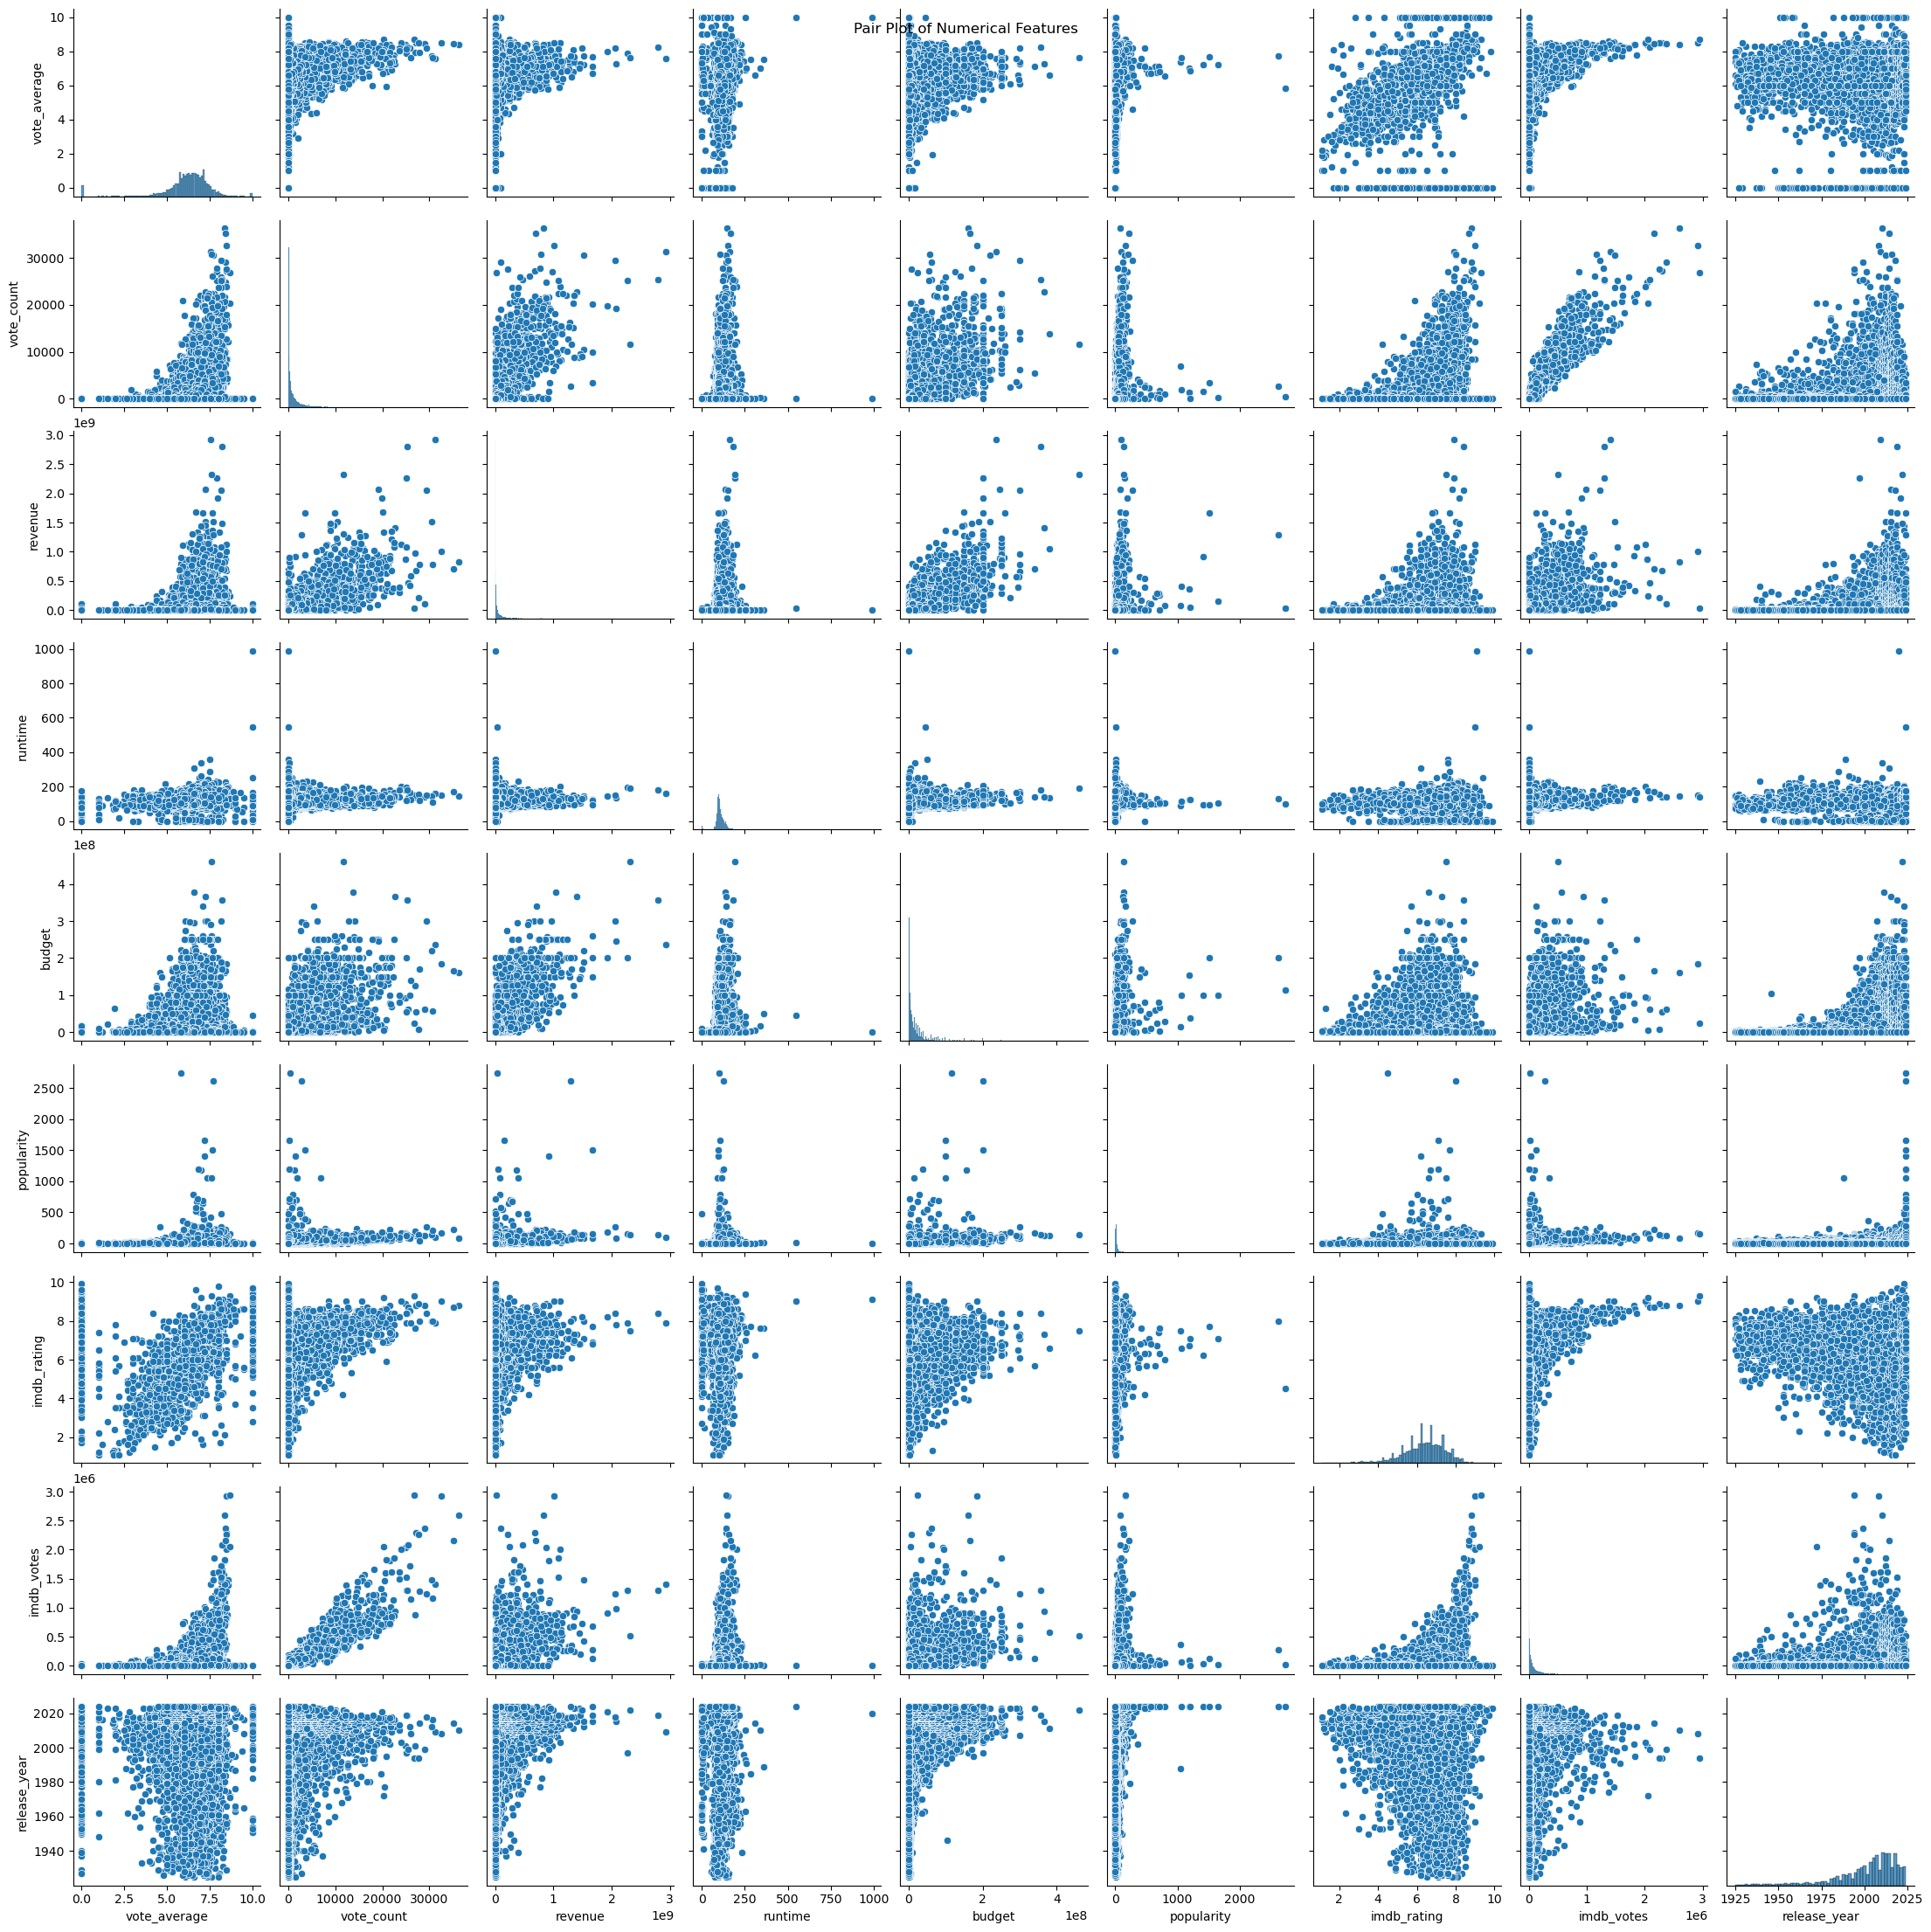

In [ ]:
sns.pairplot(df3[list_col])
plt.suptitle('Pair Plot of Numerical Features')
plt.show()


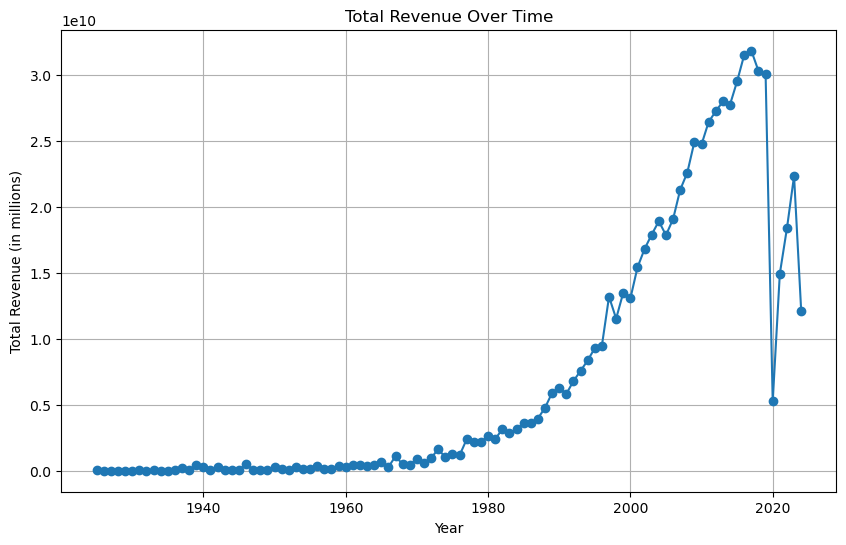

In [ ]:
revenue_by_year = df3.groupby('release_year')['revenue'].sum()
plt.figure(figsize=(10, 6))
revenue_by_year.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Total Revenue (in millions)')
plt.title('Total Revenue Over Time')
plt.grid(True)
plt.show()


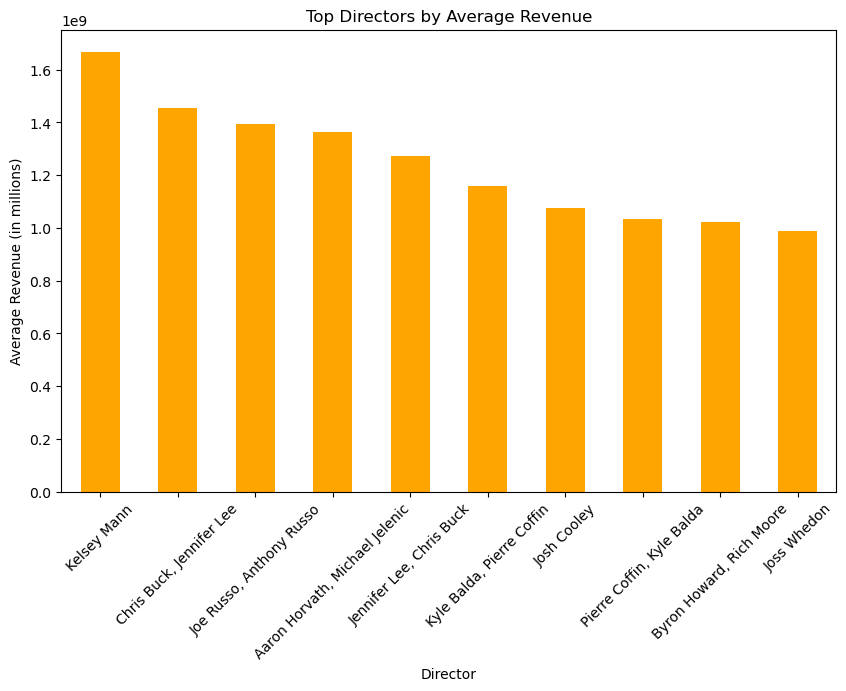

In [ ]:
top_directors = df3.groupby('director')['revenue'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_directors.plot(kind='bar', color='orange')
plt.xlabel('Director')
plt.ylabel('Average Revenue (in millions)')
plt.title('Top Directors by Average Revenue')
plt.xticks(rotation=45)
plt.show()


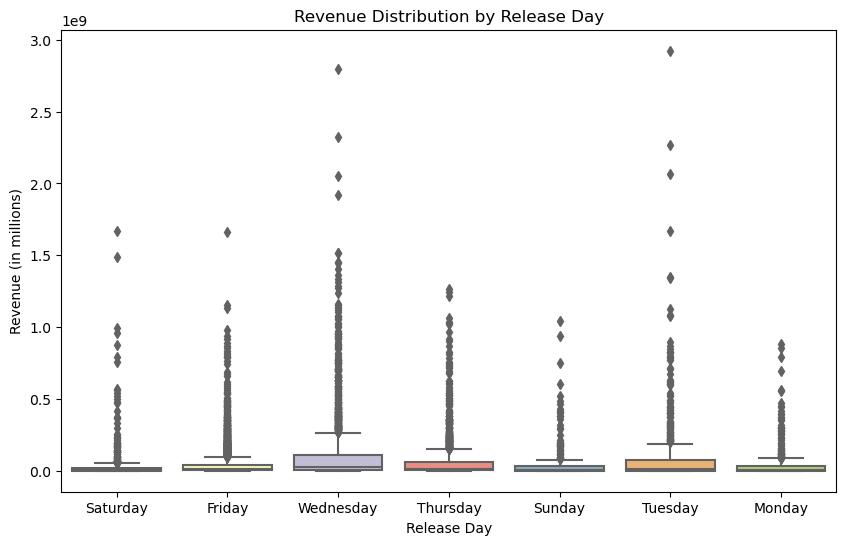

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='release_day', y='revenue', data=df3, palette='Set3')
plt.xlabel('Release Day')
plt.ylabel('Revenue (in millions)')
plt.title('Revenue Distribution by Release Day')
plt.show()

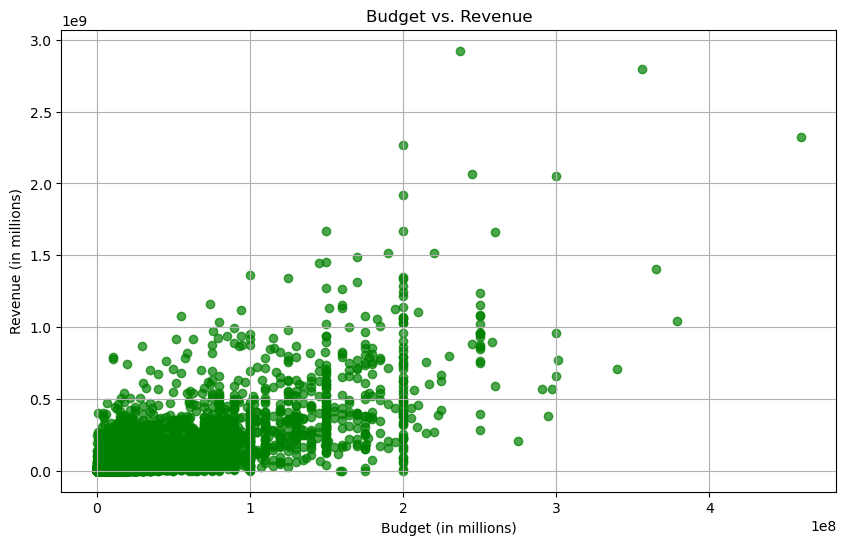

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df3['budget'], df3['revenue'], alpha=0.7, c='green')
plt.xlabel('Budget (in millions)')
plt.ylabel('Revenue (in millions)')
plt.title('Budget vs. Revenue')
plt.grid(True)
plt.show()

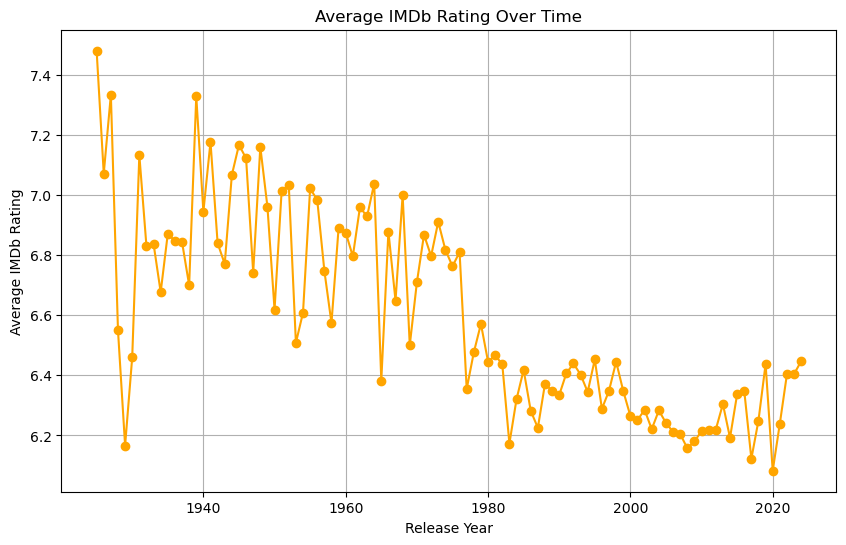

In [ ]:
avg_imdb_rating_by_year = df3.groupby('release_year')['imdb_rating'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_imdb_rating_by_year.index, avg_imdb_rating_by_year.values, marker='o', linestyle='-', color='orange')
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Rating')
plt.title('Average IMDb Rating Over Time')
plt.grid(True)
plt.show()


In [ ]:
numerical_columns = list(df3.select_dtypes(include=['number']).columns)

numerical_columns

['vote_average',
 'vote_count',
 'revenue',
 'runtime',
 'budget',
 'popularity',
 'imdb_rating',
 'imdb_votes',
 'release_year']

In [ ]:
df4=df3[numerical_columns]
df4.head()

vote_average  vote_count      revenue  runtime      budget  popularity  \
0         5.841      2606.0    4257354.0     98.0   4000000.0      16.744   
1         6.483       329.0   12136938.0    109.0  21000000.0      13.344   
2         8.204     20385.0  775398007.0    121.0  11000000.0      97.149   
3         7.821     18994.0  940335536.0    100.0  94000000.0     114.663   
4         8.474     27113.0  677387716.0    142.0  55000000.0     131.921   

   imdb_rating  imdb_votes  release_year  
0          6.7    112081.0          1995  
1          6.6     19143.0          1993  
2          8.6   1469262.0          1977  
3          8.2   1128651.0          2003  
4          8.8   2297482.0          1994

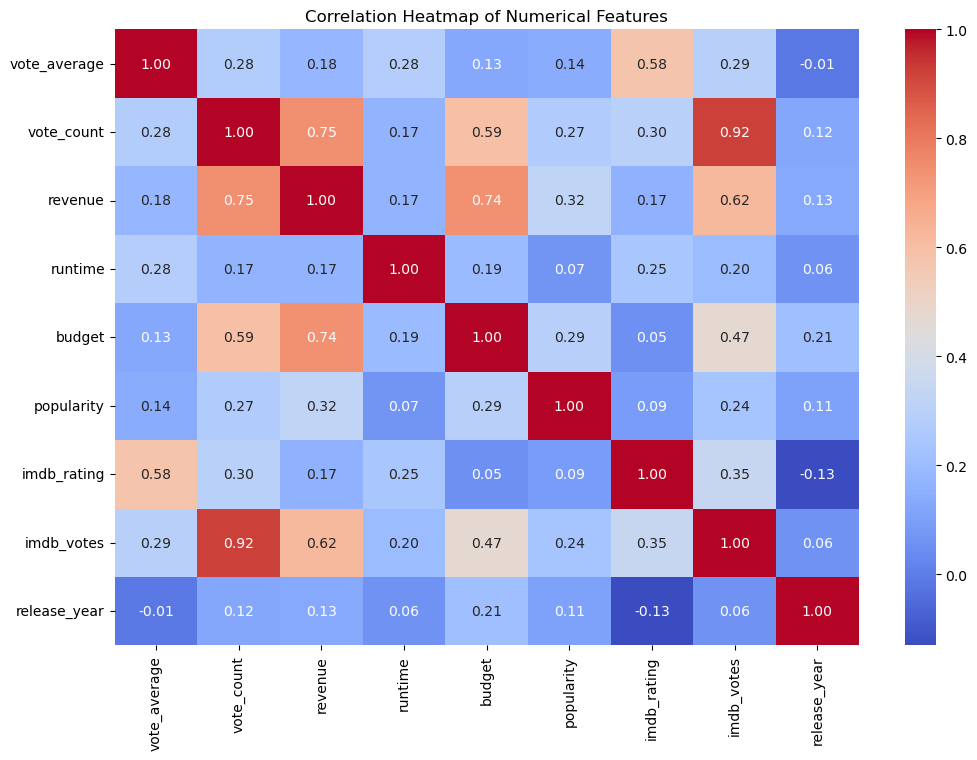

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df4.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


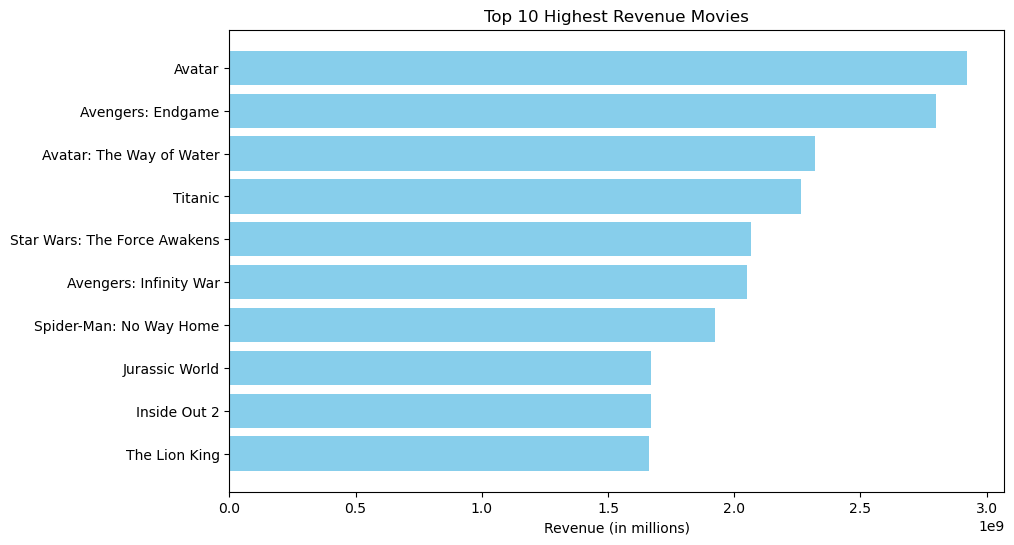

In [ ]:
# Get the top 10 highest revenue movies
top_revenue_movies = df3.nlargest(10, 'revenue')[['title', 'revenue']]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_revenue_movies['title'], top_revenue_movies['revenue'], color='skyblue')
plt.xlabel('Revenue (in millions)')
plt.title('Top 10 Highest Revenue Movies')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest revenue at the top
plt.show()


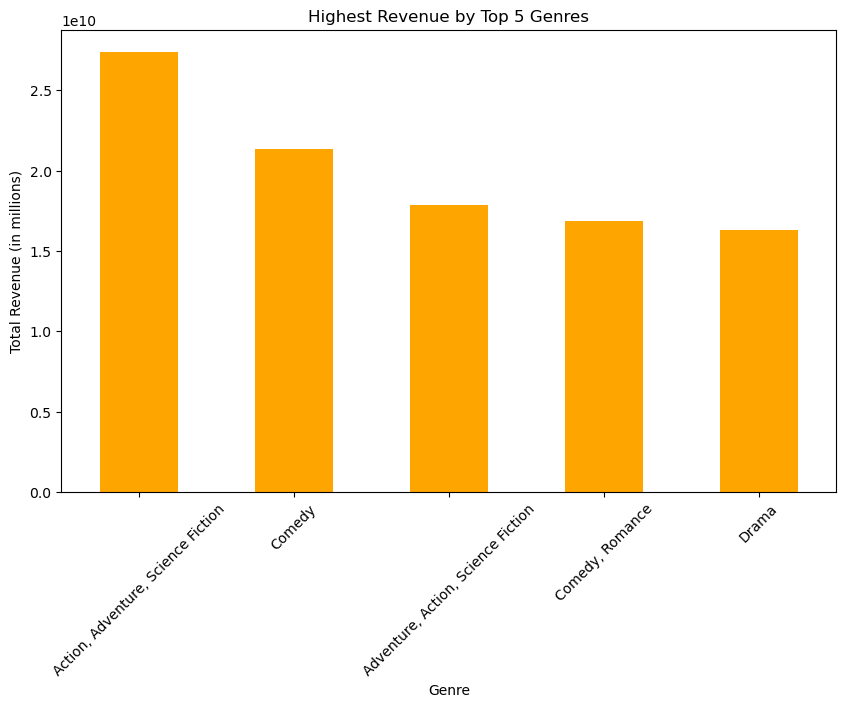

In [ ]:
# Calculate total revenue by genre
revenue_by_genre = df3.groupby('genres')['revenue'].sum().sort_values(ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
revenue_by_genre.plot(kind='bar', color='orange')
plt.xlabel('Genre')
plt.ylabel('Total Revenue (in millions)')
plt.title('Highest Revenue by Top 5 Genres')
plt.xticks(rotation=45)
plt.show()


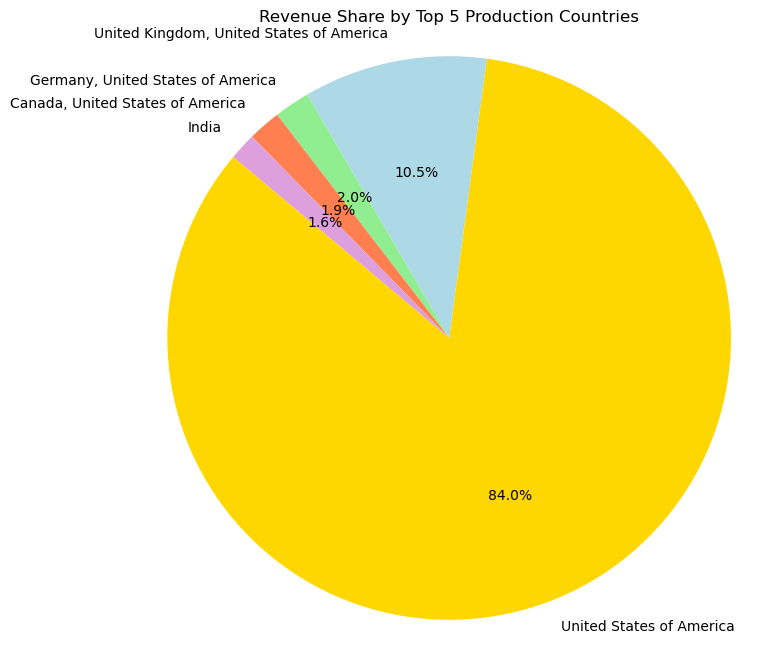

In [ ]:
top_countries_revenue = df3.groupby('production_countries')['revenue'].sum().nlargest(5)
plt.figure(figsize=(8, 8))
plt.pie(top_countries_revenue, labels=top_countries_revenue.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightblue', 'lightgreen', 'coral', 'plum'])
plt.title('Revenue Share by Top 5 Production Countries')
plt.axis('equal')
plt.show()


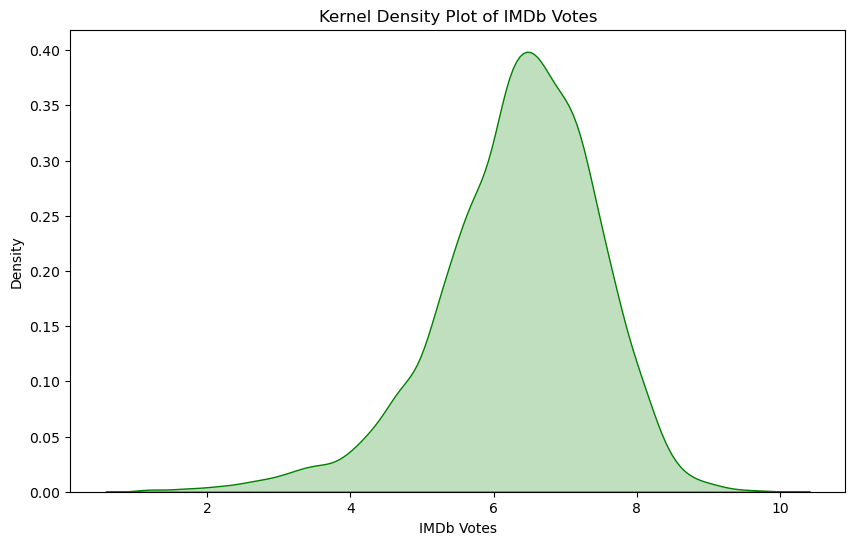

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df3, x='imdb_rating', fill=True, color='green')
plt.xlabel('IMDb Votes')
plt.ylabel('Density')
plt.title('Kernel Density Plot of IMDb Votes')
plt.show()


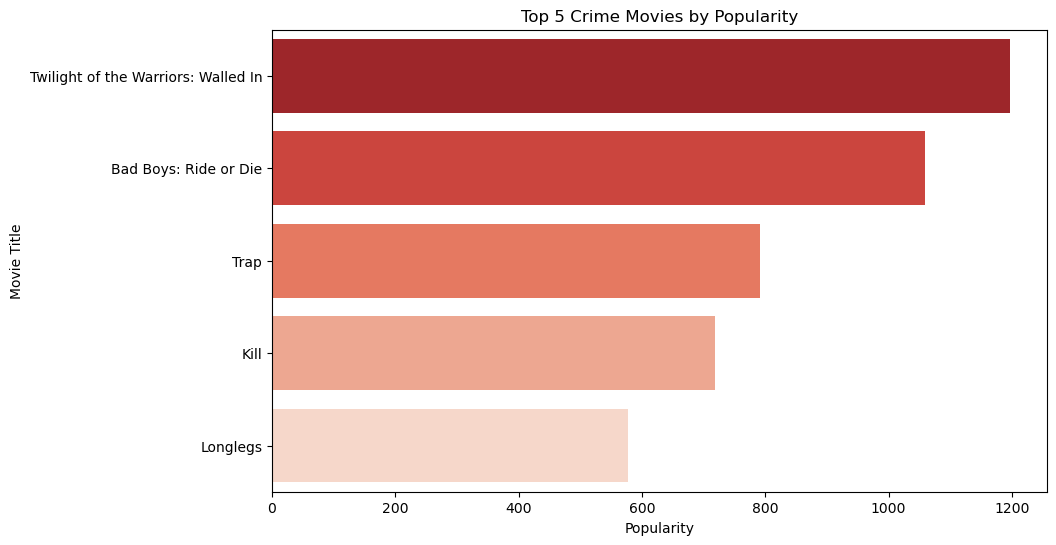

In [ ]:
# Filter the dataset to include only 'Crime' genre movies
crime_movies = df3[df3['genres'].str.contains('Crime', case=False, na=False)]

# Select the top 5 crime movies by popularity
top_5_crime_movies = crime_movies.nlargest(5, 'popularity')[['title', 'popularity']]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='popularity', y='title', data=top_5_crime_movies, palette='Reds_r')
plt.xlabel('Popularity')
plt.ylabel('Movie Title')
plt.title('Top 5 Crime Movies by Popularity')
plt.show()


# PCA

In [ ]:
df3.shape

(11053, 17)

In [ ]:
# Remove non-quantitative columns
columns_to_remove = ['title', 'status', 'original_language', 'genres', 'production_countries', 'director', 'release_month', 'release_day']
data_clean = df3.drop(columns=columns_to_remove)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize the data using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

# Convert the scaled data back to a DataFrame for easier manipulation
data_scaled_df = pd.DataFrame(data_scaled, columns=data_clean.columns)

# Inspect the normalized data
print(data_scaled_df.head())

   vote_average  vote_count   revenue   runtime    budget  popularity  \
0     -0.286907    0.355211 -0.388439 -0.349548 -0.511725   -0.134058   
1      0.183422   -0.394574 -0.336586  0.051425 -0.051044   -0.192732   
2      1.444227    6.209590  4.686219  0.488850 -0.322033    1.253506   
3      1.163641    5.751553  5.771626 -0.276644  1.927174    1.555749   
4      1.642029    8.425028  4.041241  1.254344  0.870318    1.853573   

   imdb_rating  imdb_votes  release_year  
0     0.321722    0.170282     -0.334503  
1     0.232285   -0.359233     -0.441220  
2     2.021012    7.902820     -1.294957  
3     1.663266    5.962189      0.092365  
4     2.199884   12.621604     -0.387862  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.decomposition import PCA

# Apply PCA with n_components=2
pca_2 = PCA(n_components=2)
data_pca_2 = pca_2.fit_transform(data_scaled_df)

# Calculate explained variance
explained_variance_2d = pca_2.explained_variance_ratio_.sum()
print(f"Explained variance by 2 components: {explained_variance_2d:.2%}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Explained variance by 2 components: 56.70%


In [ ]:
data_pca_2.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(11053, 2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


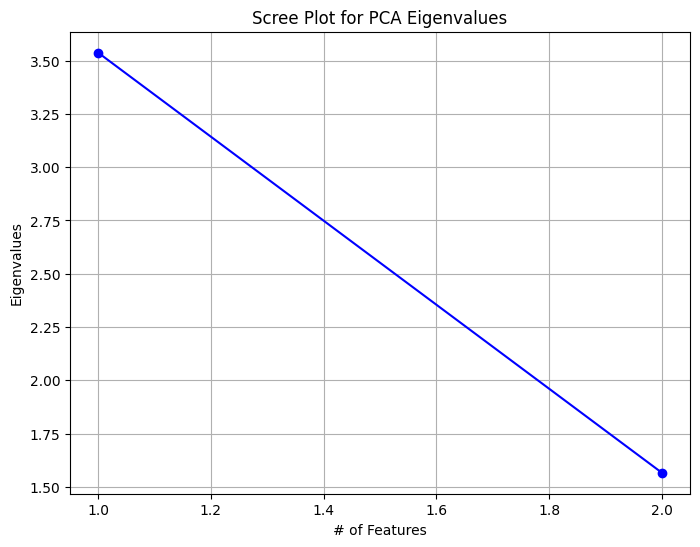

In [ ]:
# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(pca_2.explained_variance_) + 1), pca_2.explained_variance_, marker='o', linestyle='-', color='blue')
plt.xlabel('# of Features')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot for PCA Eigenvalues')
plt.grid(True)
plt.show()

In [ ]:
# Apply PCA with n_components=3
pca_3 = PCA(n_components=3)
data_pca_3 = pca_3.fit_transform(data_scaled_df)

# Calculate explained variance
explained_variance_3d = pca_3.explained_variance_ratio_.sum()
print(f"Explained variance by 3 components: {explained_variance_3d:.2%}")

Explained variance by 3 components: 67.97%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Apply PCA with n_components=5
pca_5 = PCA(n_components=5)
data_pca_5 = pca_5.fit_transform(data_scaled_df)

# Calculate explained variance
explained_variance_5d = pca_5.explained_variance_ratio_.sum()
print(f"Explained variance by 5 components: {explained_variance_5d:.2%}")

Explained variance by 5 components: 86.35%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


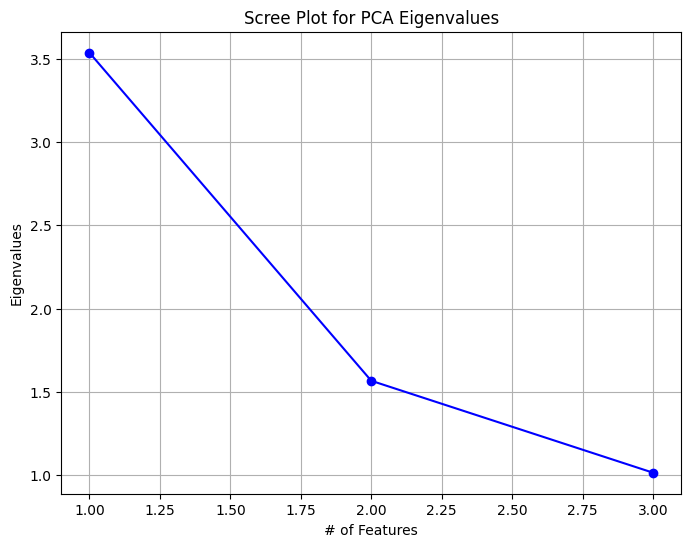

In [ ]:
# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(pca_3.explained_variance_) + 1), pca_3.explained_variance_, marker='o', linestyle='-', color='blue')
plt.xlabel('# of Features')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot for PCA Eigenvalues')
plt.grid(True)
plt.show()

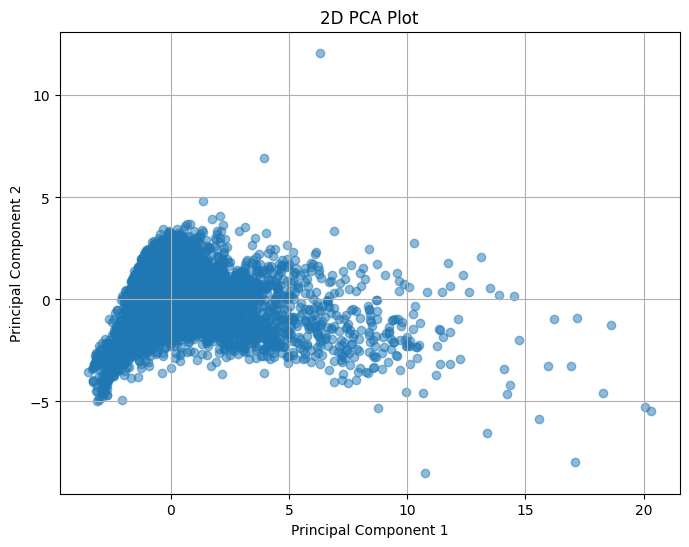

In [ ]:
import matplotlib.pyplot as plt

# Visualization for 2D PCA
plt.figure(figsize=(8, 6))
plt.scatter(data_pca_2[:, 0], data_pca_2[:, 1], alpha=0.5)
plt.title('2D PCA Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

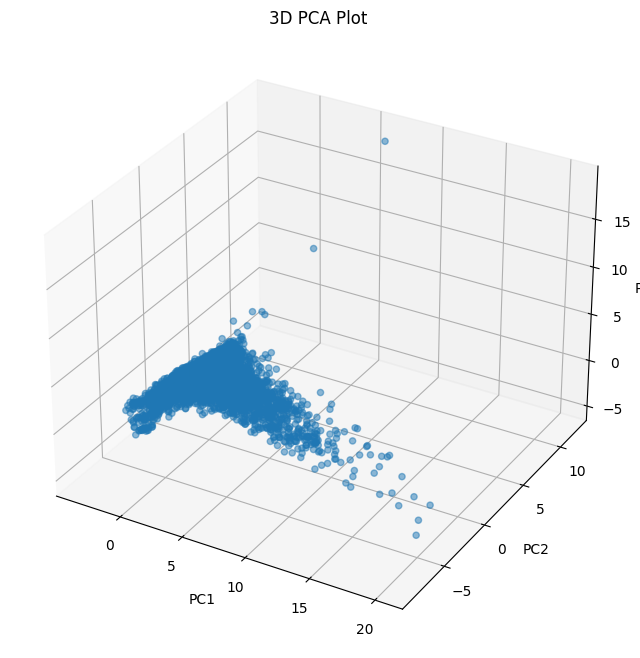

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Visualization for 3D PCA
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca_3[:, 0], data_pca_3[:, 1], data_pca_3[:, 2], alpha=0.5)
ax.set_title('3D PCA Plot')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

Number of components needed to explain 95% variance: 7


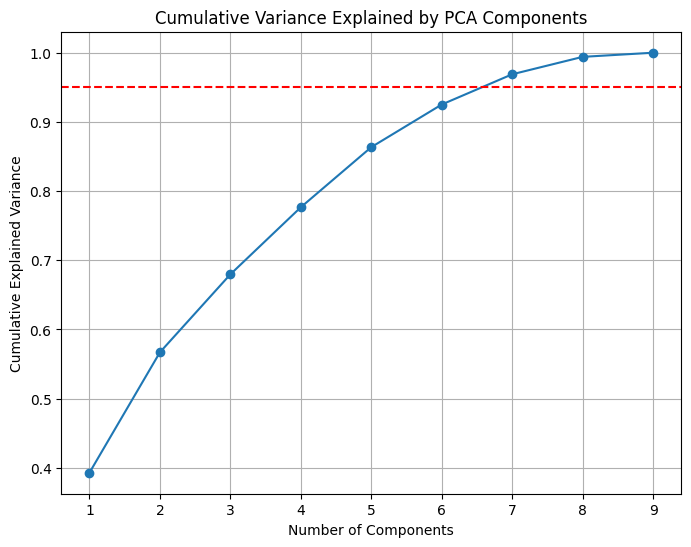

In [ ]:
# Apply PCA with all components
pca_full = PCA()
data_pca_full = pca_full.fit_transform(data_scaled_df)

# Calculate cumulative variance explained
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
components_needed = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components needed to explain 95% variance: {components_needed}")

# Plot cumulative variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1),cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.title('Cumulative Variance Explained by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
# Apply PCA with n_components=6
pca_6 = PCA(n_components=6)
data_pca_6 = pca_6.fit_transform(data_scaled_df)

# Calculate explained variance
explained_variance_6d = pca_6.explained_variance_ratio_.sum()
print(f"Explained variance by 6 components: {explained_variance_6d:.2%}")

Explained variance by 6 components: 92.51%


In [ ]:
# Calculate cumulative variance explained by each component
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Variance explained by the first 6 components
variance_6_components = cumulative_variance[5]
print(f"Cumulative variance explained by the first 6 components: {variance_6_components:.2%}")

# Variance explained by the first 7 components
variance_7_components = cumulative_variance[6]
print(f"Cumulative variance explained by the first 7 components: {variance_7_components:.2%}")

Cumulative variance explained by the first 6 components: 92.51%
Cumulative variance explained by the first 7 components: 96.88%


In [ ]:
# Eigenvalues are the variance explained by each principal component
eigenvalues = pca_full.explained_variance_

# Extract the top 3 eigenvalues
top_3_eigenvalues = eigenvalues[:3]
print(f"Top 3 eigenvalues: {top_3_eigenvalues}")

Top 3 eigenvalues: [3.53672062 1.56658586 1.014434  ]


# Clustering

In [ ]:
df3.shape

(11053, 17)

In [ ]:


# Choose 'genres' as the label and drop it from the main data
labels = df3['genres']
data_cleaned = df3.drop(columns=['genres'])

data_cleaned.head()

title  vote_average  vote_count    status      revenue  runtime  \
0      Four Rooms         5.841      2606.0  Released    4257354.0     98.0   
1  Judgment Night         6.483       329.0  Released   12136938.0    109.0   
2       Star Wars         8.204     20385.0  Released  775398007.0    121.0   
3    Finding Nemo         7.821     18994.0  Released  940335536.0    100.0   
4    Forrest Gump         8.474     27113.0  Released  677387716.0    142.0   

       budget original_language  popularity      production_countries  \
0   4000000.0                en      16.744  United States of America   
1  21000000.0                en      13.344  United States of America   
2  11000000.0                en      97.149  United States of America   
3  94000000.0                en     114.663  United States of America   
4  55000000.0                en     131.921  United States of America   

                                            director  imdb_rating  imdb_votes  \
0  Quentin Tarantino, Robert Rodriguez, Allison A...          6.7    112081.0   
1                                    Stephen Hopkins          6.6     19143.0   
2                                       George Lucas          8.6   1469262.0   
3                                     Andrew Stanton          8.2   1128651.0   
4                                    Robert Zemeckis          8.8   2297482.0   

   release_year release_month release_day  
0          1995      December    Saturday  
1          1993       October      Friday  
2          1977           May   Wednesday  
3          2003           May      Friday  
4          1994          June    Thursday

In [ ]:
# Ensure all columns are numeric
data_quantitative = data_cleaned.select_dtypes(include=[float, int])

data_quantitative.drop(columns=['release_year'],inplace=True)

# Show the first few rows of the quantitative data
data_quantitative.head()

vote_average  vote_count      revenue  runtime      budget  popularity  \
0         5.841      2606.0    4257354.0     98.0   4000000.0      16.744   
1         6.483       329.0   12136938.0    109.0  21000000.0      13.344   
2         8.204     20385.0  775398007.0    121.0  11000000.0      97.149   
3         7.821     18994.0  940335536.0    100.0  94000000.0     114.663   
4         8.474     27113.0  677387716.0    142.0  55000000.0     131.921   

   imdb_rating  imdb_votes  
0          6.7    112081.0  
1          6.6     19143.0  
2          8.6   1469262.0  
3          8.2   1128651.0  
4          8.8   2297482.0

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_quantitative)

# Convert back to DataFrame for visualization
data_scaled_df = pd.DataFrame(data_scaled, columns=data_quantitative.columns)

# Show the normalized data
data_scaled_df.head()

vote_average  vote_count   revenue   runtime    budget  popularity  \
0     -0.286907    0.355211 -0.388439 -0.349548 -0.511725   -0.134058   
1      0.183422   -0.394574 -0.336586  0.051425 -0.051044   -0.192732   
2      1.444227    6.209590  4.686219  0.488850 -0.322033    1.253506   
3      1.163641    5.751553  5.771626 -0.276644  1.927174    1.555749   
4      1.642029    8.425028  4.041241  1.254344  0.870318    1.853573   

   imdb_rating  imdb_votes  
0     0.321722    0.170282  
1     0.232285   -0.359233  
2     2.021012    7.902820  
3     1.663266    5.962189  
4     2.199884   12.621604

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the dataset to 3 dimensions
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_scaled)

# Calculate the explained variance
explained_variance = pca.explained_variance_ratio_.sum()
print(f"Explained variance after PCA reduction to 3D: {explained_variance:.2%}")

# Convert back to DataFrame for visualization
data_pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2', 'PC3'])

# Show the PCA-reduced data
data_pca_df.head()

Explained variance after PCA reduction to 3D: 73.70%


PC1       PC2       PC3
0  -0.211129  0.139689 -0.485943
1  -0.458058  0.454111  0.070112
2   9.810591 -0.180409 -3.217205
3   9.830518 -1.718741 -2.223160
4  13.593416 -0.432826 -4.436051

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define the range of k values to test
k_values = range(2, 11)

# Compute silhouette scores for each k
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_pca)
    labels_kmeans = kmeans.labels_
    score = silhouette_score(data_pca, labels_kmeans)
    silhouette_scores.append(score)

# Print the silhouette scores for each k
for k, score in zip(k_values, silhouette_scores):
    print(f"k={k}, Silhouette Score={score:.4f}")

k=2, Silhouette Score=0.6582
k=3, Silhouette Score=0.3586
k=4, Silhouette Score=0.3815
k=5, Silhouette Score=0.3841
k=6, Silhouette Score=0.3408
k=7, Silhouette Score=0.3000
k=8, Silhouette Score=0.3546
k=9, Silhouette Score=0.3174
k=10, Silhouette Score=0.3174


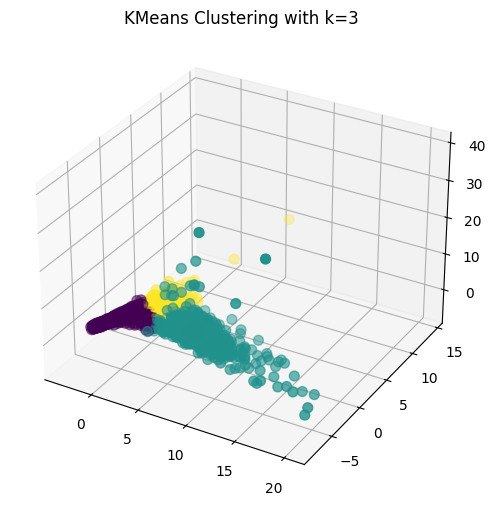

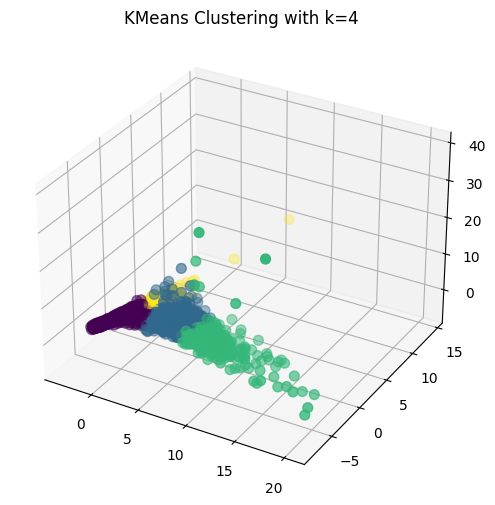

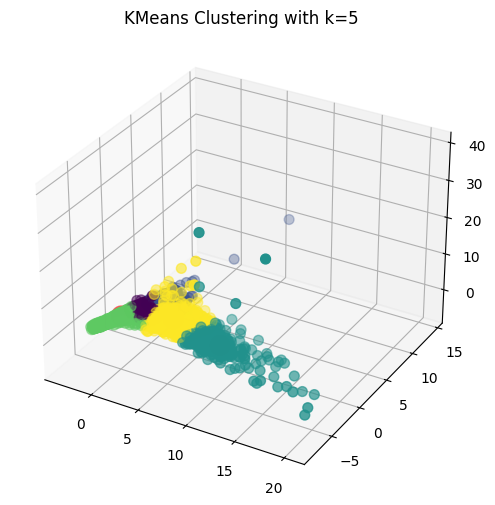

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Perform KMeans for 3 different k values (based on silhouette method)
k_selected = [3, 4, 5]  # Example, replace with best k from silhouette method

for k in k_selected:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_pca)
    centroids = kmeans.cluster_centers_

    # Plot the clusters
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=kmeans.labels_, cmap='viridis', s=50)
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=200, c='red', label='Centroids')
    ax.set_title(f'KMeans Clustering with k={k}')
    plt.show()

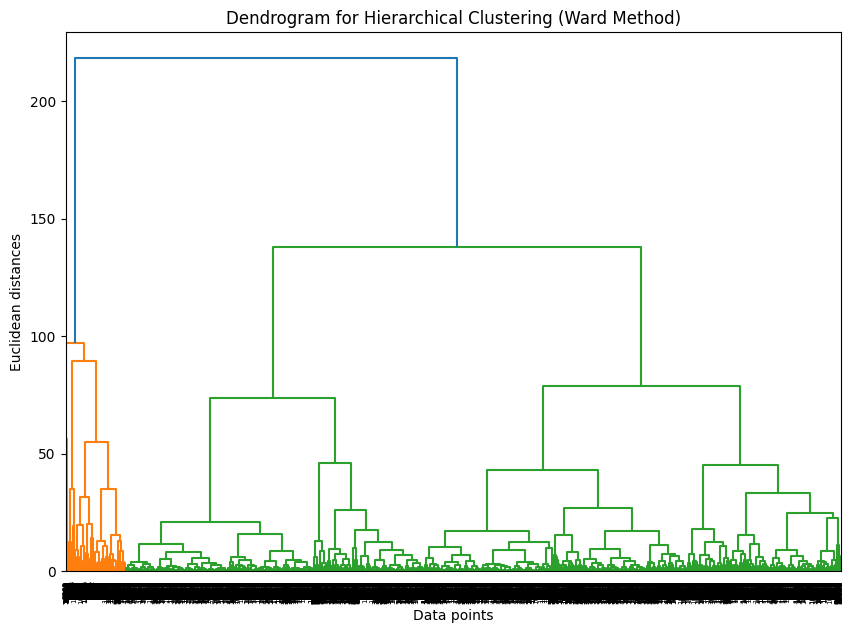

In [ ]:
import scipy.cluster.hierarchy as sch

# Perform hierarchical clustering using Ward's method
linkage_matrix = sch.linkage(data_pca, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering (Ward Method)')
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')
plt.show()

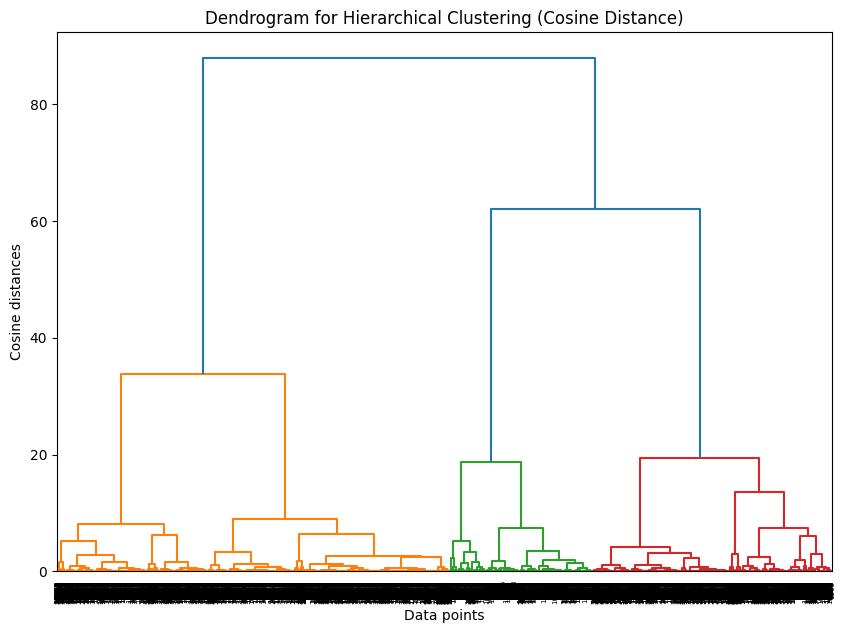

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import pdist, squareform

# Step 1: Compute cosine distances directly using pdist
cosine_dist = pdist(data_pca, metric='cosine')  # This gives a condensed distance matrix directly

# Step 2: Perform hierarchical clustering using the condensed cosine distance matrix
linkage_matrix = sch.linkage(cosine_dist, method='ward')

# Step 3: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering (Cosine Distance)')
plt.xlabel('Data points')
plt.ylabel('Cosine distances')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Extract clusters by cutting the dendrogram at a specific distance
# You can set t to the distance you want to cut the dendrogram at
clusters_hierarchical = fcluster(linkage_matrix, t=80, criterion='distance')

# Display the first few clusters assigned
print(clusters_hierarchical[:10])

num_clusters = len(np.unique(clusters_hierarchical))

print(num_clusters)

[5 5 3 2 2 3 5 5 3 5]
5


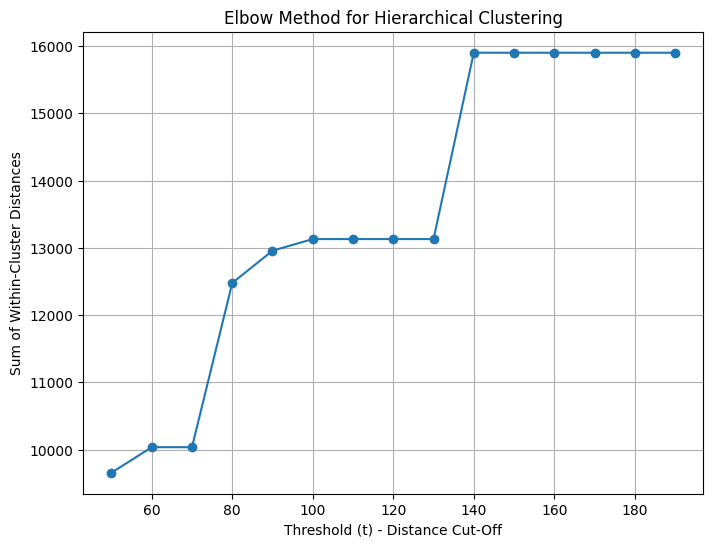

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import pairwise_distances

# Create a list to store the sum of within-cluster distances
within_cluster_distances = []

# Try different numbers of clusters by varying t
t_values = range(50, 200, 10)  # Adjust range of t as necessary

for t in t_values:
    # Extract clusters for each t value
    clusters = fcluster(linkage_matrix, t=t, criterion='distance')

    # Calculate the sum of within-cluster distances (inertia-like metric)
    distance_sum = 0
    for cluster_label in np.unique(clusters):
        cluster_points = data_pca[clusters == cluster_label]
        # Compute the centroid of the cluster
        centroid = np.mean(cluster_points, axis=0)
        # Compute sum of distances between points in the cluster and the centroid
        distances = np.sum(np.linalg.norm(cluster_points - centroid, axis=1))
        distance_sum += distances

    within_cluster_distances.append(distance_sum)

# Plot the sum of within-cluster distances (elbow plot)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(t_values, within_cluster_distances, marker='o')
plt.title('Elbow Method for Hierarchical Clustering')
plt.xlabel('Threshold (t) - Distance Cut-Off')
plt.ylabel('Sum of Within-Cluster Distances')
plt.grid(True)
plt.show()

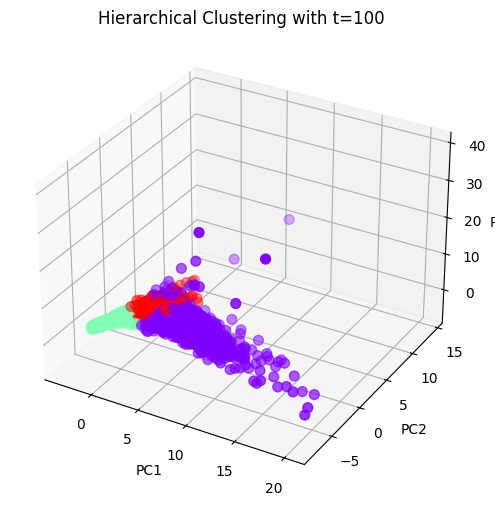

In [ ]:
# Extract clusters by cutting the dendrogram at t = 100
clusters_hierarchical = fcluster(linkage_matrix, t=100, criterion='distance')

# Visualize the clusters in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=clusters_hierarchical, cmap='rainbow', s=50)
ax.set_title('Hierarchical Clustering with t=100')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [ ]:
# Apply DBSCAN with initial parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Start with typical values for eps and min_samples
dbscan_labels = dbscan.fit_predict(data_pca)

# Get the number of clusters (-1 represents noise/outliers)
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of clusters found by DBSCAN: {num_clusters}")
print(f"Number of noise points (outliers): {list(dbscan_labels).count(-1)}")

Number of clusters found by DBSCAN: 5
Number of noise points (outliers): 347


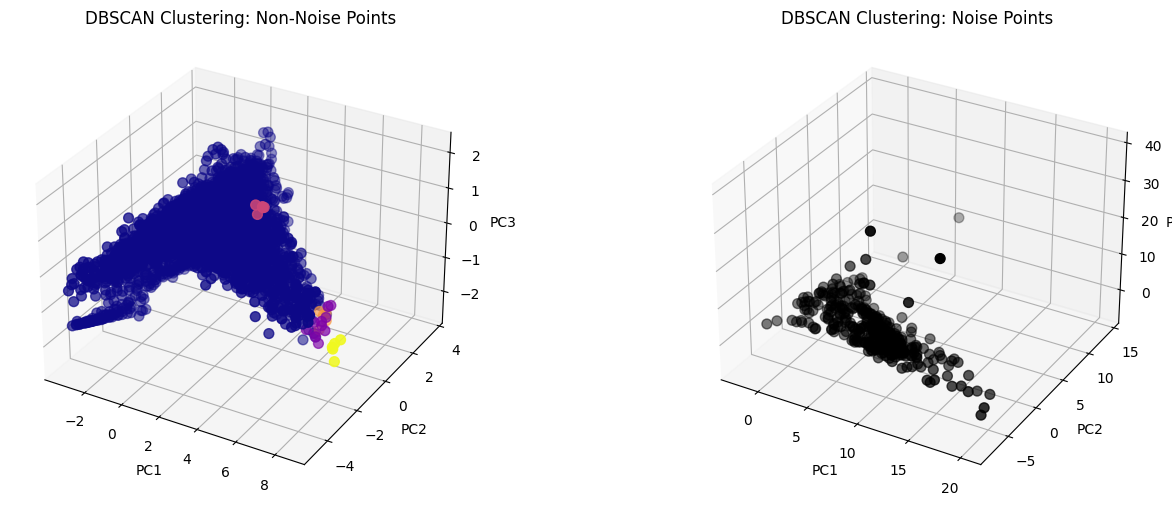

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_pca)

# Plot the clusters (without noise) and noise points separately
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), subplot_kw={'projection': '3d'})

# Plot actual clusters (non-noise points) in ax1
mask_non_noise = dbscan_labels != -1
ax1.scatter(data_pca[mask_non_noise, 0], data_pca[mask_non_noise, 1], data_pca[mask_non_noise, 2],
            c=dbscan_labels[mask_non_noise], cmap='plasma', s=50)
ax1.set_title('DBSCAN Clustering: Non-Noise Points')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')

# Plot noise points in ax2
mask_noise = dbscan_labels == -1
ax2.scatter(data_pca[mask_noise, 0], data_pca[mask_noise, 1], data_pca[mask_noise, 2],
            c='black', s=50, label='Noise')
ax2.set_title('DBSCAN Clustering: Noise Points')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')

plt.show()

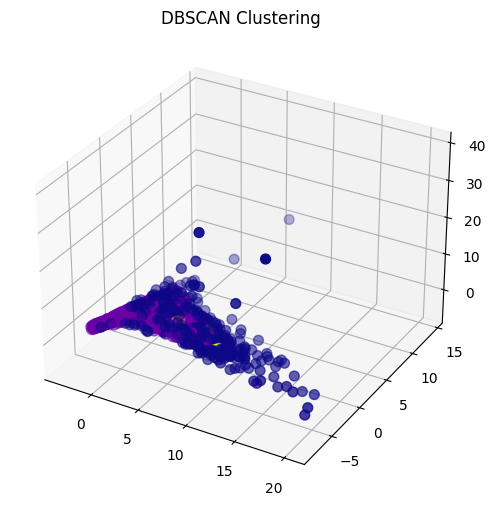

In [ ]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_pca)

# Plot DBSCAN clusters
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=dbscan_labels, cmap='plasma', s=50)
ax.set_title('DBSCAN Clustering')
plt.show()

# Association Rule Mining

In [ ]:
df3.shape

(11053, 17)

# Genre Vs Production Countries

In [ ]:
df3['production_countries'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


production_countries
United States of America                                                               5517
India                                                                                   640
United Kingdom, United States of America                                                438
United Kingdom                                                                          224
Russia                                                                                  196
                                                                                       ... 
Argentina, Canada, Denmark, Spain, Taiwan, United Kingdom, United States of America       1
Australia, China                                                                          1
Hong Kong, Japan, Netherlands, South Korea                                                1
Brazil, Hungary, Portugal                                                                 1
Argentina, Uruguay                                                                        1
Name: count, Length: 1035, dtype: int64

In [ ]:
# Prepare the movie data with genres and production countries combined as transactions
movie_transactions = df3[['genres', 'production_countries']]
movie_transactions['genres'] = movie_transactions['genres'].str.split(', ')
movie_transactions['production_countries'] = movie_transactions['production_countries'].str.split(', ')
movie_transactions['transaction'] = movie_transactions['genres'] + movie_transactions['production_countries']

# One-hot encode the transactions
te = TransactionEncoder()
te_ary = te.fit(movie_transactions['transaction']).transform(movie_transactions['transaction'])
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-10-6f4f459693fd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_transactions['genres'] = movie_transactions['genres'].str.split(', ')
<ipython-input-10-6f4f459693fd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [ ]:
movie_transactions.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


genres        production_countries  \
0                              [Comedy]  [United States of America]   
1             [Action, Crime, Thriller]  [United States of America]   
2  [Adventure, Action, Science Fiction]  [United States of America]   
3                   [Animation, Family]  [United States of America]   
4              [Comedy, Drama, Romance]  [United States of America]   

                                         transaction  
0                 [Comedy, United States of America]  
1  [Action, Crime, Thriller, United States of Ame...  
2  [Adventure, Action, Science Fiction, United St...  
3      [Animation, Family, United States of America]  
4  [Comedy, Drama, Romance, United States of Amer...

In [ ]:
# Applying the Apriori algorithm with a minimum support threshold of 0.1
frequent_itemsets = apriori(df_trans, min_support=0.1, use_colnames=True)

# Generating association rules with minimum confidence threshold of 0.5
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Top 15 rules based on support, confidence, and lift
top_15_support = rules.nlargest(15, 'support')
top_15_confidence = rules.nlargest(15, 'confidence')
top_15_lift = rules.nlargest(15, 'lift')

print("Top 15 Association Rules by Support")
print(top_15_support)
print("\nTop 15 Association Rules by Confidence")
print(top_15_confidence)
print("\nTop 15 Association Rules by Lift")
print(top_15_lift)

Top 15 Association Rules by Support
   antecedents                 consequents  antecedent support  \
5      (Drama)  (United States of America)            0.474441   
2     (Comedy)  (United States of America)            0.360536   
7   (Thriller)  (United States of America)            0.233059   
0     (Action)  (United States of America)            0.229169   
6    (Romance)  (United States of America)            0.192165   
4    (Romance)                     (Drama)            0.192165   
1  (Adventure)  (United States of America)            0.162128   
3      (Crime)  (United States of America)            0.147743   

   consequent support   support  confidence      lift  leverage  conviction  \
5            0.699358  0.314666    0.663234  0.948348 -0.017138    0.892734   
2            0.699358  0.258844    0.717942  1.026574  0.006700    1.065890   
7            0.699358  0.174975    0.750776  1.073523  0.011984    1.206316   
0            0.699358  0.161495    0.704698  1.007636

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Genre Vs Ratings

In [ ]:
df_r = df3.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
set(df3['genres'].values)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'Adventure, Fantasy, Action, Comedy, Science Fiction',
 'Romance, Comedy, Horror',
 'Action, Thriller, Crime',
 'Comedy, Music, Family',
 'Adventure, Drama, Action, Comedy, Romance',
 'Fantasy, Horror, Science Fiction, Action',
 'Animation, Fantasy, Action, Science Fiction',
 'Romance, Western, Music',
 'Mystery, Thriller, Crime, Drama',
 'Science Fiction, War',
 'Family, Action, Comedy',
 'Comedy, Crime, Romance',
 'Thriller, Horror, Mystery',
 'Mystery, Crime, Drama',
 'Mystery, Crime, Thriller',
 'Comedy, Drama, Romance',
 'Drama, Comedy, History',
 'Science Fiction, Adventure, Comedy, Drama',
 'Action, Adventure, Crime, War',
 'Comedy, Drama, Romance, Thriller',
 'Animation, TV Movie',
 'Action, Crime, History, Thriller',
 'Mystery, Thriller, Crime',
 'Action, Comedy, Crime, Fantasy',
 'Drama, Romance, Science Fiction, Adventure',
 'War, Drama, History, Romance',
 'Comedy, Crime, Drama, Fantasy',
 'Music, Romance, Comedy, Drama',
 'Mystery, Science Fiction',
 'Adventure, Drama, Fa

In [ ]:
# Function to categorize IMDb ratings into High, Medium, and Low
def categorize_rating(rating):
    if rating >= 7.5:
        return 'High Rating'
    elif rating >= 5.5:
        return 'Medium Rating'
    else:
        return 'Low Rating'

# Apply the rating categorization
df_r['rating_category'] = df_r['imdb_rating'].apply(categorize_rating)

# Convert the genres column to strings and handle missing values
df_r['genres'] = df_r['genres'].fillna('').astype(str)

# Splitting the genres column into a list of genres
df_r['genres'] = df_r['genres'].str.split(', ')

# Creating transactions by combining genres and rating category into a single list
df_r['transaction'] = df_r.apply(lambda row: row['genres'] + [row['rating_category']], axis=1)

# One-hot encode the transaction data
te = TransactionEncoder()
te_ary = te.fit(df_r['transaction']).transform(df_r['transaction'])
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm with a minimum support of 0.1
frequent_itemsets = apriori(df_trans, min_support=0.1, use_colnames=True)

# Generate association rules with minimum confidence of 0.5
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

top_15_support = rules.nlargest(15, 'support')
top_15_confidence = rules.nlargest(15, 'confidence')
top_15_lift = rules.nlargest(15, 'lift')

print("Top 15 Association Rules by Support:")
print(top_15_support)

print("\nTop 15 Association Rules by Confidence:")
print(top_15_confidence)

print("\nTop 15 Association Rules by Lift:")
print(top_15_lift)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 15 Association Rules by Support:
   antecedents      consequents  antecedent support  consequent support  \
4      (Drama)  (Medium Rating)            0.474441            0.671673   
2     (Comedy)  (Medium Rating)            0.360536            0.671673   
7   (Thriller)  (Medium Rating)            0.233059            0.671673   
0     (Action)  (Medium Rating)            0.229169            0.671673   
6    (Romance)  (Medium Rating)            0.192165            0.671673   
5    (Romance)          (Drama)            0.192165            0.474441   
1  (Adventure)  (Medium Rating)            0.162128            0.671673   
3      (Crime)  (Medium Rating)            0.147743            0.671673   

    support  confidence      lift  leverage  conviction  zhangs_metric  
4  0.333665    0.703280  1.047057  0.014996    1.106522       0.085514  
2  0.247173    0.685571  1.020692  0.005011    1.044201       0.031702  
7  0.156609    0.671972  1.000445  0.000070    1.000912       0.0005

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


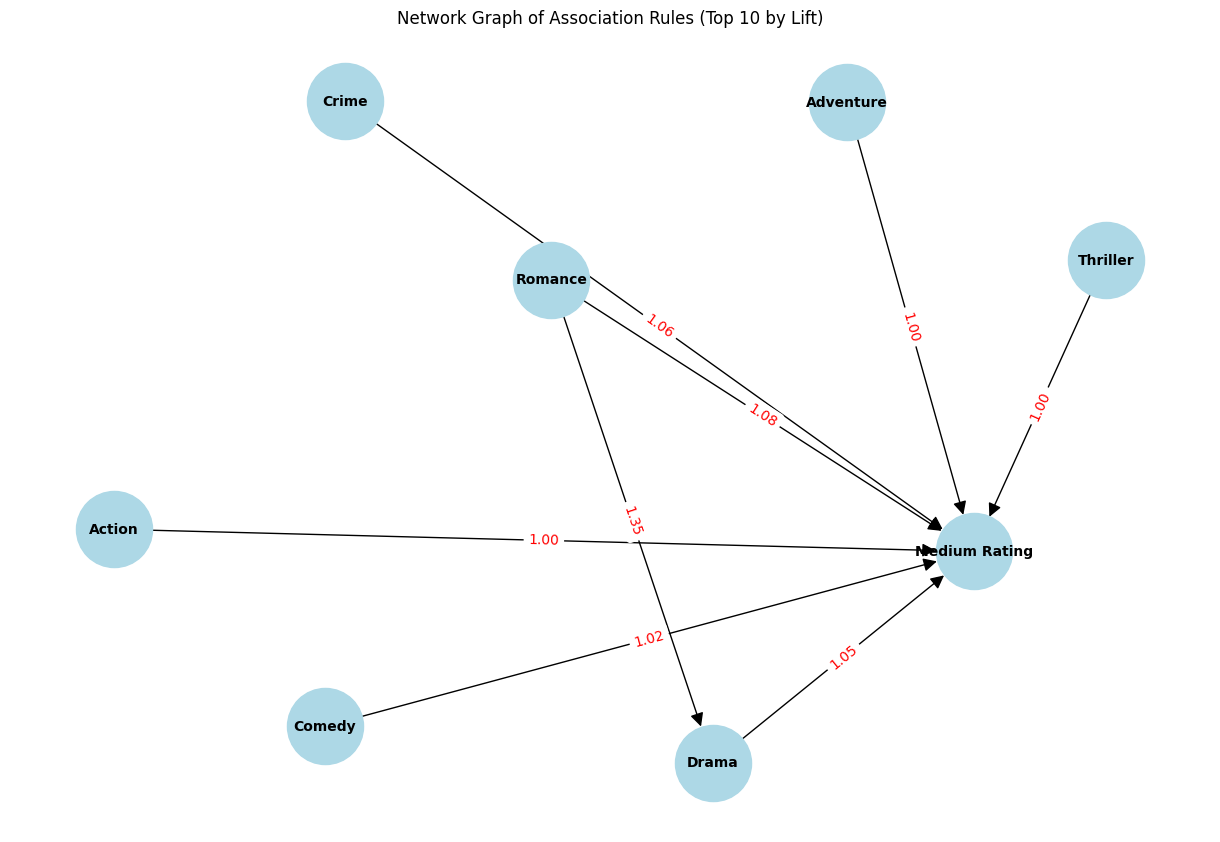

In [ ]:
# Create a network graph object
G = nx.DiGraph()

# We will use the top 10 rules for the visualization
for _, row in top_15_lift.head(10).iterrows():
    antecedents = ', '.join(list(row['antecedents']))
    consequents = ', '.join(list(row['consequents']))
    G.add_edge(antecedents, consequents, weight=row['lift'])

# Set positions for all nodes
pos = nx.spring_layout(G, k=2)

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, font_weight='bold', arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{d:.2f}' for u, v, d in G.edges(data='weight')}, font_color='red')

plt.title('Network Graph of Association Rules (Top 10 by Lift)')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


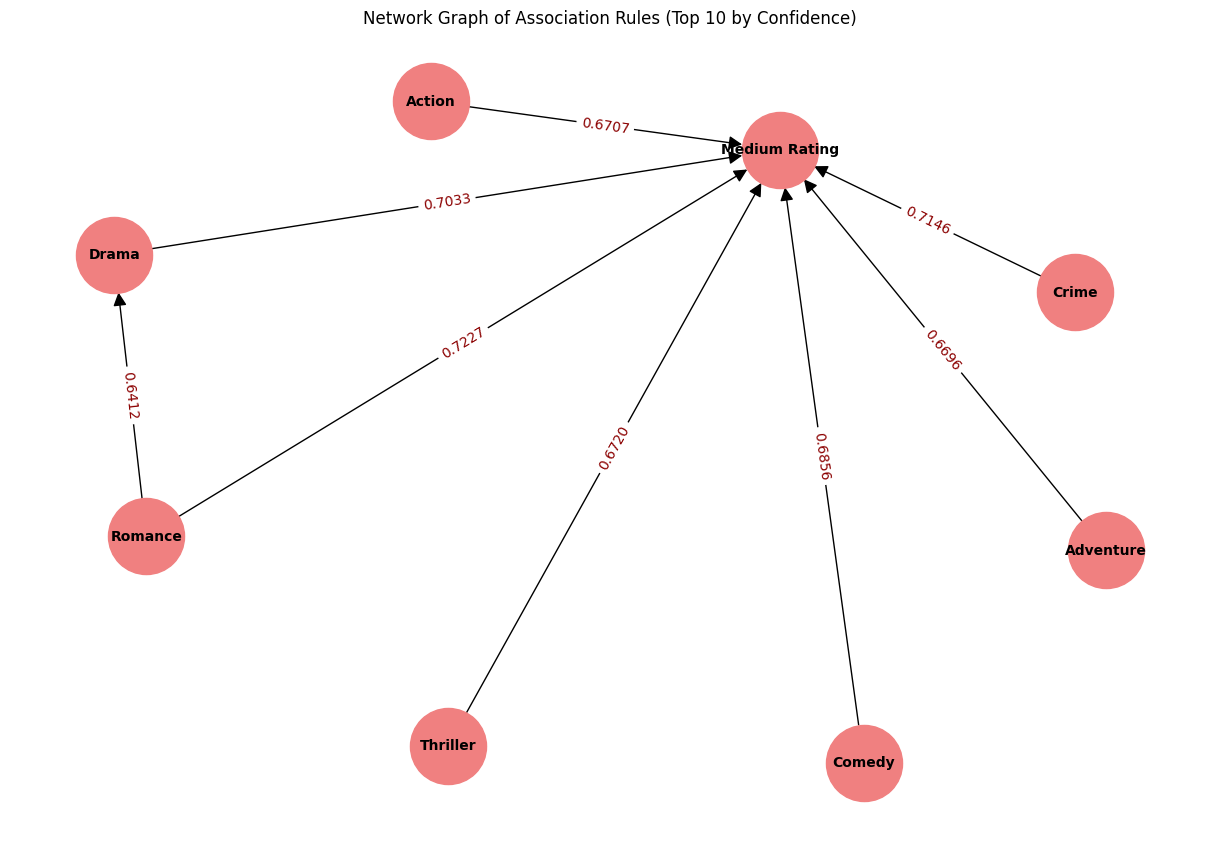

In [ ]:
# Create a network graph object for Confidence
G_confidence = nx.DiGraph()

# Add edges to the graph based on the top 10 association rules by Confidence
for _, row in top_15_confidence.head(10).iterrows():
    antecedents = ', '.join(list(row['antecedents']))
    consequents = ', '.join(list(row['consequents']))
    G_confidence.add_edge(antecedents, consequents, weight=row['confidence'])

pos = nx.spring_layout(G_confidence, k=2)

plt.figure(figsize=(12, 8))
nx.draw(G_confidence, pos, with_labels=True, node_color='lightcoral', node_size=3000, font_size=10, font_weight='bold', arrowsize=20)
edge_labels = nx.get_edge_attributes(G_confidence, 'weight')
nx.draw_networkx_edge_labels(G_confidence, pos, edge_labels={(u, v): f'{d:.4f}' for u, v, d in G_confidence.edges(data='weight')}, font_color='darkred')

plt.title('Network Graph of Association Rules (Top 10 by Confidence)')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


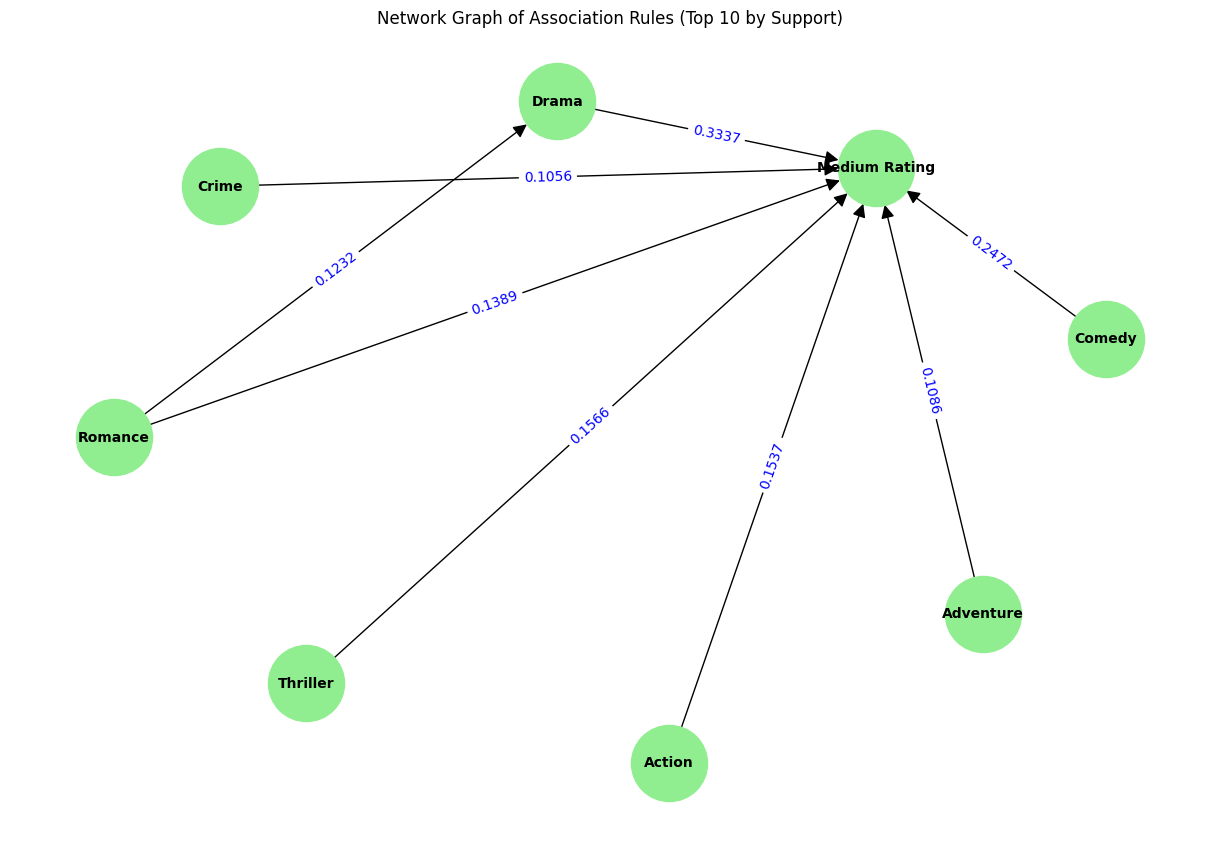

In [ ]:
# Create a network graph object for Support
G_support = nx.DiGraph()

# Add edges to the graph based on the top 10 association rules by Support
for _, row in top_15_support.head(10).iterrows():
    antecedents = ', '.join(list(row['antecedents']))
    consequents = ', '.join(list(row['consequents']))
    G_support.add_edge(antecedents, consequents, weight=row['support'])
pos = nx.spring_layout(G_support, k=2)

plt.figure(figsize=(12, 8))
nx.draw(G_support, pos, with_labels=True, node_color='lightgreen', node_size=3000, font_size=10, font_weight='bold', arrowsize=20)
edge_labels = nx.get_edge_attributes(G_support, 'weight')
nx.draw_networkx_edge_labels(G_support, pos, edge_labels={(u, v): f'{d:.4f}' for u, v, d in G_support.edges(data='weight')}, font_color='blue')

plt.title('Network Graph of Association Rules (Top 10 by Support)')
plt.show()

# Naive Bayes

In [ ]:
# Binning 'revenue' into Low, Medium, and High categories
def bin_revenue(revenue):
    if revenue < 5000000:
        return 'Low'
    elif 5000000 <= revenue < 50000000:
        return 'Medium'
    else:
        return 'High'

df3['revenue_level'] = df3['revenue'].apply(bin_revenue)

# Apply binning function
df3['revenue_level'] = df3['revenue'].apply(bin_revenue)

# Step 2: Selecting and Discretizing Features
# Discretize numeric features to make them more suitable for Multinomial Naive Bayes
features_to_discretize = ['budget', 'popularity', 'vote_average', 'runtime']
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
discretized_features = discretizer.fit_transform(df3[features_to_discretize])

# Create interaction term if both 'budget' and 'popularity' exist
if 'budget' in df3.columns and 'popularity' in df3.columns:
    df3['budget_popularity'] = df3['budget'] * df3['popularity']
else:
    print("One of 'budget' or 'popularity' columns is missing. Skipping interaction term.")
    df3['budget_popularity'] = 0  # Set a placeholder to avoid errors

# Label encoding for categorical features
label_encoder_genres = LabelEncoder()
label_encoder_countries = LabelEncoder()

# Apply label encoding to categorical columns
if 'genres' in df3.columns:
    df3['genres_encoded'] = label_encoder_genres.fit_transform(df3['genres'].astype(str))
if 'production_countries' in df3.columns:
    df3['countries_encoded'] = label_encoder_countries.fit_transform(df3['production_countries'].astype(str))

# Combine discretized features, interaction, and encoded categorical features
discretized_df = pd.DataFrame(discretized_features, columns=features_to_discretize)
interaction_features = df3[['budget_popularity']]
categorical_features = df3[['genres_encoded', 'countries_encoded']]
features = pd.concat([discretized_df, interaction_features, categorical_features], axis=1)
target = df3['revenue_level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
X_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


budget  popularity  vote_average  runtime  budget_popularity  \
480       0.0         0.0           2.0      0.0       3.460700e+08   
10810     0.0         0.0           2.0      0.0       6.263082e+08   
4064      0.0         0.0           2.0      0.0       1.562175e+09   
8225      0.0         0.0           1.0      0.0       3.139000e+08   
9432      0.0         0.0           1.0      0.0       6.807840e+07   
...       ...         ...           ...      ...                ...   
5734      0.0         0.0           2.0      0.0       1.746150e+07   
5191      0.0         0.0           1.0      0.0       2.781270e+07   
5390      0.0         0.0           2.0      0.0       5.700000e+08   
860       0.0         0.0           2.0      0.0       2.179638e+07   
7270      0.0         0.0           2.0      0.0       2.636400e+08   

       genres_encoded  countries_encoded  
480               859                956  
10810             805                931  
4064              394                968  
8225              115                835  
9432              718                893  
...               ...                ...  
5734              718                968  
5191             2000                968  
5390              807                968  
860              1205                968  
7270             1265                968  

[8842 rows x 7 columns]

In [ ]:
y_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


480      Medium
10810    Medium
4064     Medium
8225     Medium
9432     Medium
          ...  
5734        Low
5191        Low
5390       High
860         Low
7270        Low
Name: revenue_level, Length: 8842, dtype: object

In [ ]:
X_test

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


budget  popularity  vote_average  runtime  budget_popularity  \
10580     0.0         0.0           2.0      0.0       4.376400e+08   
7533      0.0         0.0           1.0      0.0       8.009200e+08   
10804     0.0         0.0           1.0      0.0       1.186875e+08   
2992      0.0         0.0           1.0      0.0       2.379600e+08   
8940      0.0         0.0           2.0      0.0       1.775000e+07   
...       ...         ...           ...      ...                ...   
474       0.0         0.0           2.0      0.0       1.977360e+09   
8205      0.0         0.0           2.0      0.0       6.800000e+06   
2377      0.0         0.0           1.0      0.0       1.116325e+09   
10910     0.0         0.0           1.0      0.0       3.164647e+06   
5972      0.0         0.0           1.0      0.0       1.857800e+08   

       genres_encoded  countries_encoded  
10580             842                968  
7533             1206                968  
10804             892                968  
2992             1739                968  
8940             1941                886  
...               ...                ...  
474              1005                968  
8205             1313                873  
2377             1840                968  
10910            1628                715  
5972               61                968  

[2211 rows x 7 columns]

In [ ]:
y_test

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


10580    Medium
7533     Medium
10804       Low
2992     Medium
8940       High
          ...  
474        High
8205        Low
2377     Medium
10910       Low
5972        Low
Name: revenue_level, Length: 2211, dtype: object

In [ ]:
# Model 1: Multinomial Naive Bayes with alpha tuning
best_accuracy = 0
best_alpha = 1
for alpha in [0.1, 0.5, 1, 5, 10]:
    multinomial_nb = MultinomialNB(alpha=alpha)
    multinomial_nb.fit(X_train, y_train)
    y_pred_multinomial = multinomial_nb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_multinomial)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_alpha = alpha
print(f"Best alpha for Multinomial Naive Bayes: {best_alpha} with accuracy {best_accuracy}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best alpha for Multinomial Naive Bayes: 0.1 with accuracy 0.621438263229308


In [ ]:
# Final Multinomial Model with best alpha
multinomial_nb = MultinomialNB(alpha=best_alpha)
multinomial_nb.fit(X_train, y_train)
y_pred_multinomial = multinomial_nb.predict(X_test)
print("Optimized Multinomial Naive Bayes on 'revenue_level'")
print(classification_report(y_test, y_pred_multinomial))
print("Accuracy:", accuracy_score(y_test, y_pred_multinomial))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Optimized Multinomial Naive Bayes on 'revenue_level'
              precision    recall  f1-score   support

        High       0.79      0.53      0.63       587
         Low       0.61      0.89      0.72       786
      Medium       0.54      0.43      0.48       838

    accuracy                           0.62      2211
   macro avg       0.65      0.62      0.61      2211
weighted avg       0.63      0.62      0.61      2211

Accuracy: 0.621438263229308


In [ ]:
# Model 2: Bernoulli Naive Bayes
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, y_train)
y_pred_bernoulli = bernoulli_nb.predict(X_test)
print("Bernoulli Naive Bayes on 'revenue_level' Classification")
print(classification_report(y_test, y_pred_bernoulli))
print("Accuracy:", accuracy_score(y_test, y_pred_bernoulli))

Bernoulli Naive Bayes on 'revenue_level' Classification
              precision    recall  f1-score   support

        High       0.97      0.06      0.12       587
         Low       0.86      0.07      0.13       786
      Medium       0.39      0.99      0.56       838

    accuracy                           0.42      2211
   macro avg       0.74      0.37      0.27      2211
weighted avg       0.71      0.42      0.29      2211

Accuracy: 0.41655359565807326


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Model 3: Gaussian Naive Bayes
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
y_pred_gaussian = gaussian_nb.predict(X_test)
print("Gaussian Naive Bayes on 'revenue_level' Classification")
print(classification_report(y_test, y_pred_gaussian))
print("Accuracy:", accuracy_score(y_test, y_pred_gaussian))

Gaussian Naive Bayes on 'revenue_level' Classification
              precision    recall  f1-score   support

        High       0.95      0.09      0.16       587
         Low       0.44      0.99      0.60       786
      Medium       0.19      0.08      0.11       838

    accuracy                           0.41      2211
   macro avg       0.52      0.39      0.29      2211
weighted avg       0.48      0.41      0.30      2211

Accuracy: 0.40660334690185435


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


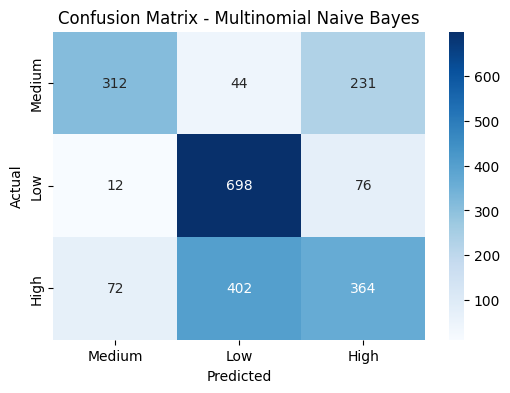

In [ ]:
from sklearn.metrics import confusion_matrix

class_labels = y_test.unique()

# Plot Confusion Matrix for Multinomial Naive Bayes
plt.figure(figsize=(6, 4))
multinomial_cm = confusion_matrix(y_test, y_pred_multinomial)
sns.heatmap(multinomial_cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Multinomial Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


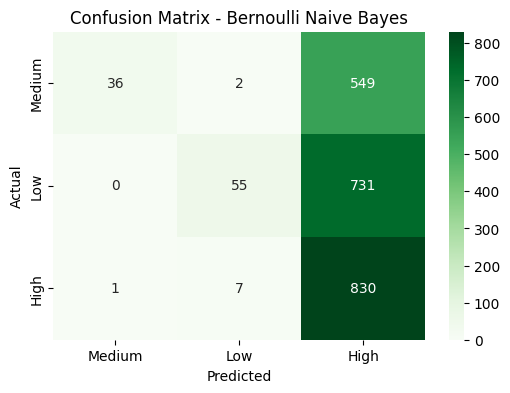

In [ ]:
# Plot Confusion Matrix for Bernoulli Naive Bayes
plt.figure(figsize=(6, 4))
bernoulli_cm = confusion_matrix(y_test, y_pred_bernoulli)
sns.heatmap(bernoulli_cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Bernoulli Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


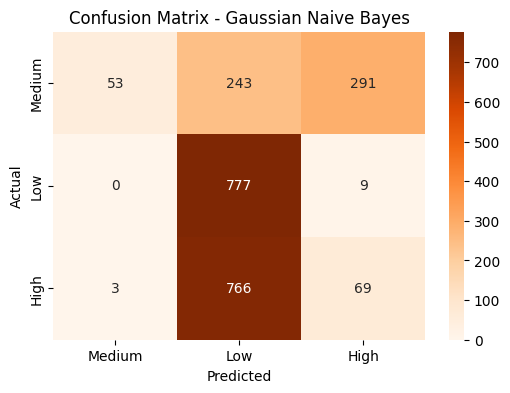

In [ ]:
# Plot Confusion Matrix for Gaussian Naive Bayes
plt.figure(figsize=(6, 4))
gaussian_cm = confusion_matrix(y_test, y_pred_gaussian)
sns.heatmap(gaussian_cm, annot=True, fmt="d", cmap="Oranges", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Selecting and Discretizing Features
features_to_discretize = ['budget', 'popularity', 'vote_average', 'runtime']
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
discretized_features = discretizer.fit_transform(df3[features_to_discretize])

# Create interaction
df3['budget_popularity'] = df3['budget'] * df3['popularity']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# One-hot encoding of genres and production countries
genres_dummies = df3['genres'].str.get_dummies(sep=', ')
countries_dummies = df3['production_countries'].str.get_dummies(sep=', ')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Combining discretized, interaction, and categorical features
discretized_df = pd.DataFrame(discretized_features, columns=features_to_discretize)
interaction_features = df3[['budget_popularity']]
features = pd.concat([discretized_df, interaction_features, genres_dummies, countries_dummies], axis=1)
target = df3['revenue_level']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define parameter grid for tuning
param_grid = {
    'max_depth': [5, 10, 15, 20, 30, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20]
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
X_test

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


budget  popularity  vote_average  runtime  budget_popularity  Action  \
10580     0.0         0.0           2.0      0.0       4.376400e+08       0   
7533      0.0         0.0           1.0      0.0       8.009200e+08       0   
10804     0.0         0.0           1.0      0.0       1.186875e+08       0   
2992      0.0         0.0           1.0      0.0       2.379600e+08       0   
8940      0.0         0.0           2.0      0.0       1.775000e+07       0   
...       ...         ...           ...      ...                ...     ...   
474       0.0         0.0           2.0      0.0       1.977360e+09       0   
8205      0.0         0.0           2.0      0.0       6.800000e+06       1   
2377      0.0         0.0           1.0      0.0       1.116325e+09       1   
10910     0.0         0.0           1.0      0.0       3.164647e+06       0   
5972      0.0         0.0           1.0      0.0       1.857800e+08       1   

       Adventure  Animation  Comedy  Crime  ...  Uganda  Ukraine  \
10580          0          0       1      0  ...       0        0   
7533           0          0       1      0  ...       0        0   
10804          0          0       1      0  ...       0        0   
2992           0          0       0      0  ...       0        0   
8940           1          0       0      0  ...       0        0   
...          ...        ...     ...    ...  ...     ...      ...   
474            0          0       0      1  ...       0        0   
8205           0          0       1      0  ...       0        0   
2377           0          0       0      0  ...       0        0   
10910          0          0       0      0  ...       0        0   
5972           1          0       0      0  ...       0        0   

       United Arab Emirates  United Kingdom  United States of America  \
10580                     0               0                         1   
7533                      0               0                         1   
10804                     0               0                         1   
2992                      0               0                         1   
8940                      0               0                         0   
...                     ...             ...                       ...   
474                       0               0                         1   
8205                      0               0                         0   
2377                      0               0                         1   
10910                     0               0                         0   
5972                      0               0                         1   

       Uruguay  Venezuela  Vietnam  Yugoslavia  Zimbabwe  
10580        0          0        0           0         0  
7533         0          0        0           0         0  
10804        0          0        0           0         0  
2992         0          0        0           0         0  
8940         0          0        0           0         0  
...        ...        ...      ...         ...       ...  
474          0          0        0           0         0  
8205         0          0        0           0         0  
2377         0          0        0           0         0  
10910        0          0        0           0         0  
5972         0          0        0           0         0  

[2211 rows x 147 columns]

In [ ]:
y_test

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


10580    Medium
7533     Medium
10804       Low
2992     Medium
8940       High
          ...  
474        High
8205        Low
2377     Medium
10910       Low
5972        Low
Name: revenue_level, Length: 2211, dtype: object

In [ ]:
X_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


budget  popularity  vote_average  runtime  budget_popularity  Action  \
480       0.0         0.0           2.0      0.0       3.460700e+08       0   
10810     0.0         0.0           2.0      0.0       6.263082e+08       0   
4064      0.0         0.0           2.0      0.0       1.562175e+09       0   
8225      0.0         0.0           1.0      0.0       3.139000e+08       1   
9432      0.0         0.0           1.0      0.0       6.807840e+07       0   
...       ...         ...           ...      ...                ...     ...   
5734      0.0         0.0           2.0      0.0       1.746150e+07       0   
5191      0.0         0.0           1.0      0.0       2.781270e+07       0   
5390      0.0         0.0           2.0      0.0       5.700000e+08       0   
860       0.0         0.0           2.0      0.0       2.179638e+07       0   
7270      0.0         0.0           2.0      0.0       2.636400e+08       0   

       Adventure  Animation  Comedy  Crime  ...  Uganda  Ukraine  \
480            0          0       1      0  ...       0        0   
10810          0          0       1      0  ...       0        0   
4064           1          0       1      0  ...       0        0   
8225           0          0       1      0  ...       0        0   
9432           0          0       1      0  ...       0        0   
...          ...        ...     ...    ...  ...     ...      ...   
5734           0          0       1      0  ...       0        0   
5191           0          0       0      0  ...       0        0   
5390           0          0       1      0  ...       0        0   
860            0          0       0      0  ...       0        0   
7270           0          0       0      0  ...       0        0   

       United Arab Emirates  United Kingdom  United States of America  \
480                       0               1                         1   
10810                     0               1                         0   
4064                      0               0                         1   
8225                      0               0                         0   
9432                      0               0                         0   
...                     ...             ...                       ...   
5734                      0               0                         1   
5191                      0               0                         1   
5390                      0               0                         1   
860                       0               0                         1   
7270                      0               0                         1   

       Uruguay  Venezuela  Vietnam  Yugoslavia  Zimbabwe  
480          0          0        0           0         0  
10810        0          0        0           0         0  
4064         0          0        0           0         0  
8225         0          0        0           0         0  
9432         0          0        0           0         0  
...        ...        ...      ...         ...       ...  
5734         0          0        0           0         0  
5191         0          0        0           0         0  
5390         0          0        0           0         0  
860          0          0        0           0         0  
7270         0          0        0           0         0  

[8842 rows x 147 columns]

In [ ]:
y_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


480      Medium
10810    Medium
4064     Medium
8225     Medium
9432     Medium
          ...  
5734        Low
5191        Low
5390       High
860         Low
7270        Low
Name: revenue_level, Length: 8842, dtype: object

In [ ]:
# Decision Tree with Gini Impurity
gini_dt = DecisionTreeClassifier(criterion='gini', random_state=42)
gini_grid_search = GridSearchCV(estimator=gini_dt, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)
gini_grid_search.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 30, None],
                         'min_samples_leaf': [1, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [ ]:
# Retrieve the best parameters and best estimator for Gini
best_gini_params = gini_grid_search.best_params_
best_gini_model = gini_grid_search.best_estimator_

print("Best Parameters for Gini Decision Tree:", best_gini_params)

Best Parameters for Gini Decision Tree: {'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 2}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Evaluating the Gini model with the best parameters
y_pred_gini = best_gini_model.predict(X_test)
print("Fine-tuned Decision Tree with Gini Impurity")
print(classification_report(y_test, y_pred_gini))
print("Gini Impurity Accuracy:", accuracy_score(y_test, y_pred_gini))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fine-tuned Decision Tree with Gini Impurity
              precision    recall  f1-score   support

        High       0.75      0.64      0.69       587
         Low       0.75      0.71      0.73       786
      Medium       0.57      0.66      0.61       838

    accuracy                           0.67      2211
   macro avg       0.69      0.67      0.68      2211
weighted avg       0.68      0.67      0.67      2211

Gini Impurity Accuracy: 0.6711895070104026


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


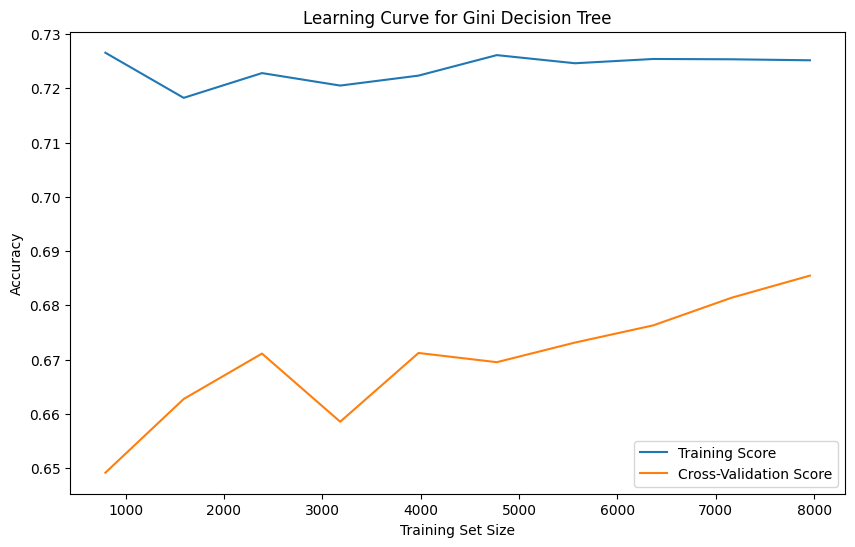

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_gini_model, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, test_mean, label="Cross-Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Gini Decision Tree")
plt.legend()
plt.show()

In [ ]:
# Decision Tree with Entropy
entropy_dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
entropy_grid_search = GridSearchCV(estimator=entropy_dt, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)
entropy_grid_search.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 30, None],
                         'min_samples_leaf': [1, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [ ]:
# Retrieve the best parameters and best estimator for Entropy
best_entropy_params = entropy_grid_search.best_params_
best_entropy_model = entropy_grid_search.best_estimator_

print("Best Parameters for Entropy Decision Tree:", best_entropy_params)

Best Parameters for Entropy Decision Tree: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Evaluating the Entropy model with the best parameters
y_pred_entropy = best_entropy_model.predict(X_test)
print("Fine-tuned Decision Tree with Entropy")
print(classification_report(y_test, y_pred_entropy))
print("Entropy Accuracy:", accuracy_score(y_test, y_pred_entropy))

Fine-tuned Decision Tree with Entropy
              precision    recall  f1-score   support

        High       0.80      0.62      0.70       587
         Low       0.79      0.69      0.74       786
      Medium       0.58      0.74      0.65       838

    accuracy                           0.69      2211
   macro avg       0.72      0.69      0.70      2211
weighted avg       0.71      0.69      0.70      2211

Entropy Accuracy: 0.6919945725915875


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


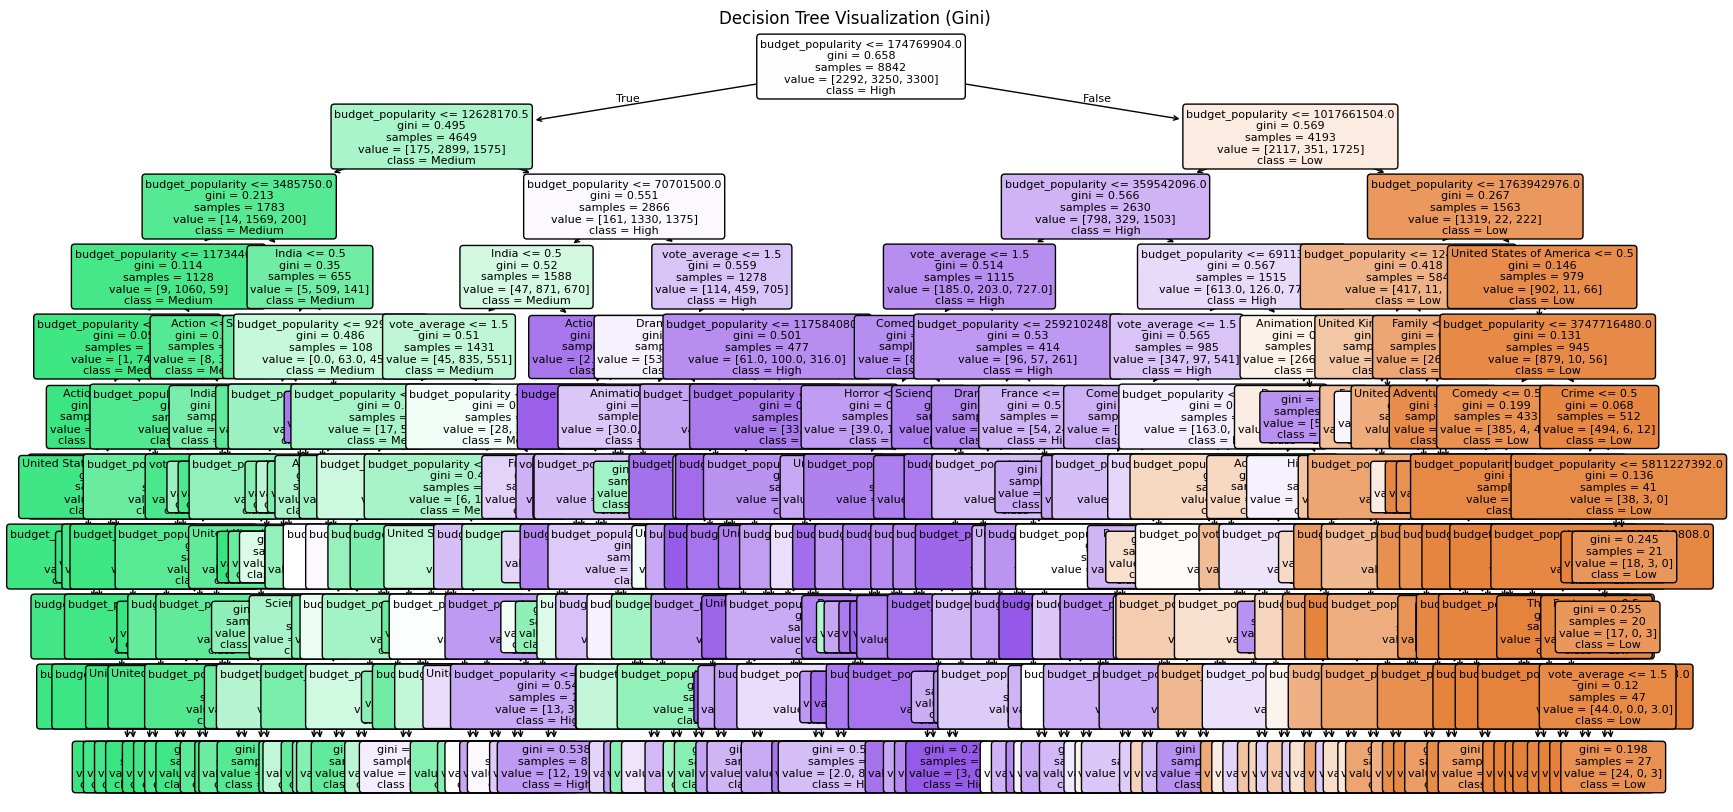

In [ ]:
# best_gini_model and best_entropy_model based on which performed better
plt.figure(figsize=(20, 10))
plot_tree(best_gini_model, feature_names=features.columns, class_names=target.unique(), filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Visualization (Gini)")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


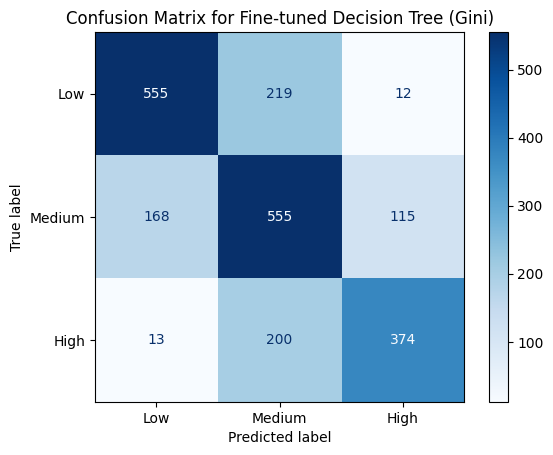

In [ ]:
# 'Best_gini_model`
y_pred = best_gini_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=target.unique())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target.unique())
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Fine-tuned Decision Tree (Gini)")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


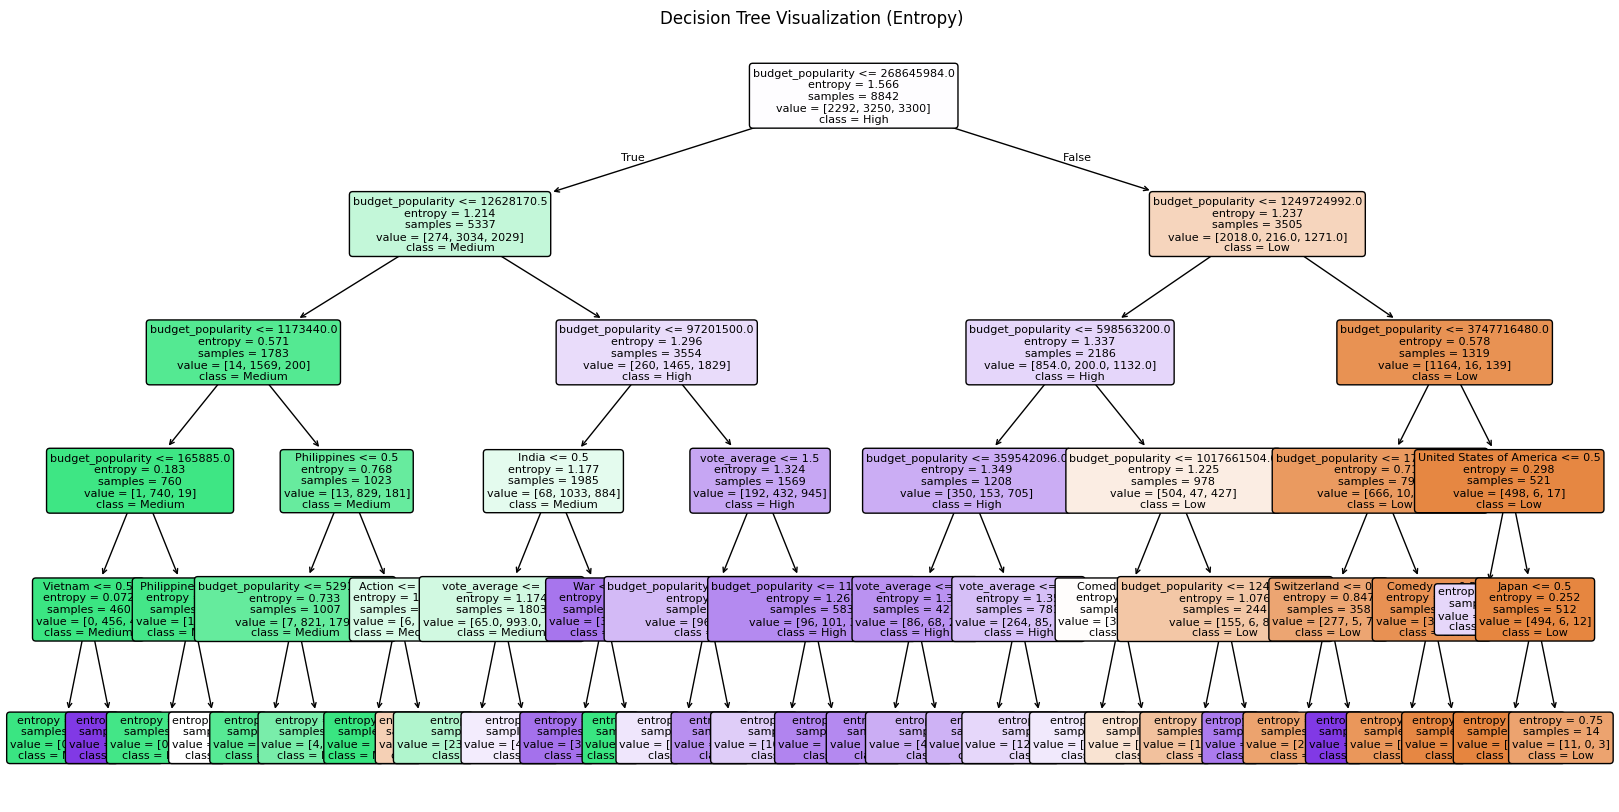

In [ ]:
# best_gini_model and best_entropy_model based on which performed better
plt.figure(figsize=(20, 10))
plot_tree(best_entropy_model, feature_names=features.columns, class_names=target.unique(), filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Visualization (Entropy)")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


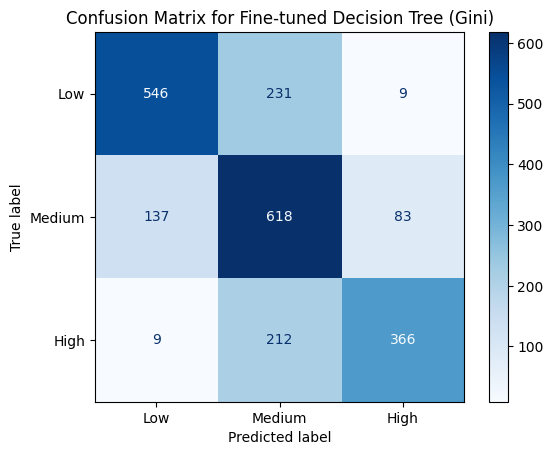

In [ ]:
# 'Best_entropy_model`
y_pred = best_entropy_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=target.unique())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target.unique())
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Fine-tuned Decision Tree (Gini)")
plt.show()

# Regression

In [ ]:
# Identifing potential binary features
binary_features = [col for col in df3.columns if df3[col].nunique() == 2]

print("Possible binary features:", binary_features)

Possible binary features: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create a binary target based on the 'popularity' column
# Define "High" popularity as above the median and "Low" popularity as below or equal to the median
median_popularity = df3['popularity'].median()
df3['popularity_level'] = df3['popularity'].apply(lambda x: 'High' if x > median_popularity else 'Low')

# Check the distribution of the new binary target
print(df3['popularity_level'].value_counts())

popularity_level
Low     5528
High    5525
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Encode the binary target
label_encoder = LabelEncoder()
df3['popularity_level'] = label_encoder.fit_transform(df3['popularity_level'])  # 1 for High, 0 for Low

# Selecting and Discretizing Features
features_to_discretize = ['budget', 'revenue', 'vote_average', 'runtime']
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
discretized_features = discretizer.fit_transform(df3[features_to_discretize])

df3['budget_revenue'] = df3['budget'] * df3['revenue']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Combine discretized, interaction, and categorical features
discretized_df = pd.DataFrame(discretized_features, columns=features_to_discretize)
interaction_features = df3[['budget_revenue']]
categorical_features = df3[['genres', 'production_countries']].apply(LabelEncoder().fit_transform)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Combine all features into a final feature set
features = pd.concat([discretized_df, interaction_features, categorical_features], axis=1)
target = df3['popularity_level']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
X_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


budget  revenue  vote_average  runtime  budget_revenue  genres  \
480       0.0      0.0           2.0      0.0    3.197325e+14     859   
10810     0.0      0.0           2.0      0.0    3.354570e+14     805   
4064      0.0      0.0           2.0      0.0    1.727998e+15     394   
8225      0.0      0.0           1.0      0.0    1.503874e+14     115   
9432      0.0      0.0           1.0      0.0    6.498001e+13     718   
...       ...      ...           ...      ...             ...     ...   
5734      0.0      0.0           2.0      0.0    5.700000e+12     718   
5191      0.0      0.0           1.0      0.0    7.020000e+12    2000   
5390      0.0      0.0           2.0      0.0    2.464456e+15     807   
860       0.0      0.0           2.0      0.0    2.040000e+12    1205   
7270      0.0      0.0           2.0      0.0    3.428048e+13    1265   

       production_countries  
480                     956  
10810                   931  
4064                    968  
8225                    835  
9432                    893  
...                     ...  
5734                    968  
5191                    968  
5390                    968  
860                     968  
7270                    968  

[8842 rows x 7 columns]

In [ ]:
y_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


480      0
10810    0
4064     0
8225     1
9432     1
        ..
5734     1
5191     1
5390     0
860      0
7270     0
Name: popularity_level, Length: 8842, dtype: int64

In [ ]:
X_test

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


budget  revenue  vote_average  runtime  budget_revenue  genres  \
10580     0.0      0.0           2.0      0.0    1.411442e+14     842   
7533      0.0      0.0           1.0      0.0    2.942195e+14    1206   
10804     0.0      0.0           1.0      0.0    3.295128e+13     892   
2992      0.0      0.0           1.0      0.0    7.160564e+14    1739   
8940      0.0      0.0           2.0      0.0    5.244430e+13    1941   
...       ...      ...           ...      ...             ...     ...   
474       0.0      0.0           2.0      0.0    1.080129e+16    1005   
8205      0.0      0.0           2.0      0.0    5.338816e+12    1313   
2377      0.0      0.0           1.0      0.0    6.720000e+14    1840   
10910     0.0      0.0           1.0      0.0    7.404635e+11    1628   
5972      0.0      0.0           1.0      0.0    7.527976e+13      61   

       production_countries  
10580                   968  
7533                    968  
10804                   968  
2992                    968  
8940                    886  
...                     ...  
474                     968  
8205                    873  
2377                    968  
10910                   715  
5972                    968  

[2211 rows x 7 columns]

In [ ]:
y_test

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


10580    0
7533     0
10804    1
2992     1
8940     0
        ..
474      0
8205     1
2377     0
10910    1
5972     1
Name: popularity_level, Length: 2211, dtype: int64

In [ ]:
# Logistic Regression Model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Multinomial Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Logistic Regression
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))
print("Logistic Regression Accuracy:", logistic_accuracy)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68      1131
           1       0.00      0.00      0.00      1080

    accuracy                           0.51      2211
   macro avg       0.26      0.50      0.34      2211
weighted avg       0.26      0.51      0.35      2211

Logistic Regression Accuracy: 0.5115332428765265


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


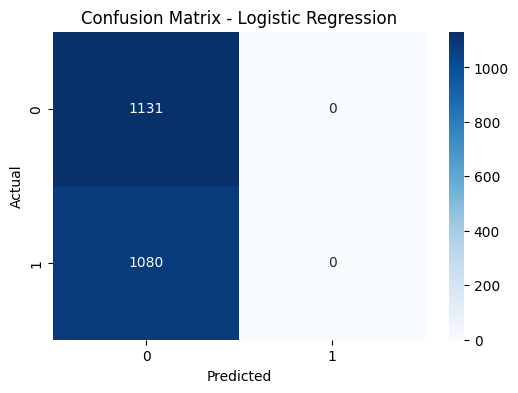

In [ ]:
# Confusion Matrix for Logistic Regression
logistic_cm = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(6, 4))
sns.heatmap(logistic_cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Multinomial Naive Bayes
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print("Multinomial Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Multinomial Naive Bayes Accuracy:", nb_accuracy)

Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.41      0.56      1131
           1       0.61      0.96      0.74      1080

    accuracy                           0.68      2211
   macro avg       0.76      0.68      0.65      2211
weighted avg       0.77      0.68      0.65      2211

Multinomial Naive Bayes Accuracy: 0.6779737675260064


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


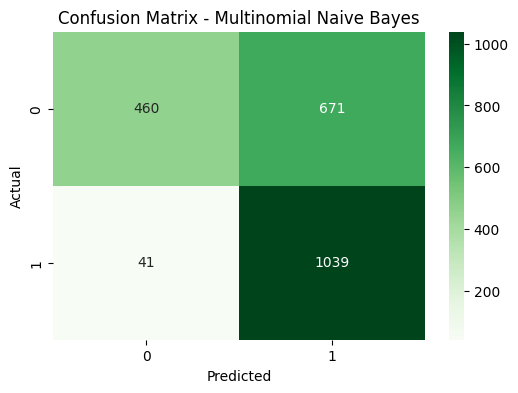

In [ ]:
# Confusion Matrix for Multinomial Naive Bayes
nb_cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(nb_cm, annot=True, fmt="d", cmap="Greens", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Multinomial Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Comparison of Results
print(f"Logistic Regression Accuracy: {logistic_accuracy}")
print(f"Multinomial Naive Bayes Accuracy: {nb_accuracy}")

Logistic Regression Accuracy: 0.5115332428765265
Multinomial Naive Bayes Accuracy: 0.6779737675260064


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Support Vector Machine

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
df3['label'] = (df3['vote_average'] >= 7.0).astype(int)

X = df3[['runtime', 'budget', 'popularity', 'revenue']]
y = df3['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("SVM Model Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SVM Model Evaluation:
Accuracy: 0.73

Confusion Matrix:
[[2405   17]
 [ 869   25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.99      0.84      2422
           1       0.60      0.03      0.05       894

    accuracy                           0.73      3316
   macro avg       0.66      0.51      0.45      3316
weighted avg       0.70      0.73      0.63      3316



In [10]:
X_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


runtime      budget  popularity     revenue
180      100.0   3000000.0       6.218  11718595.0
10168     98.0   1000000.0       6.454     27913.0
10167    105.0    220000.0       2.125    297388.0
2115      86.0   1250000.0      33.768  21722776.0
1699     106.0  39000000.0       9.229   6432551.0
...        ...         ...         ...         ...
5734     110.0   1500000.0      11.641   3800000.0
5191     109.0   2700000.0      10.301   2600000.0
5390     105.0  30000000.0      19.000  82148538.0
860       88.0   1020000.0      21.369   2000000.0
7270     116.0  10000000.0      26.364   3428048.0

[7737 rows x 4 columns]

In [11]:
X_test

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


runtime      budget  popularity     revenue
10580    100.0  10000000.0      43.764  14114415.0
7533     149.0  20000000.0      40.046  14710975.0
10804     95.0   7500000.0      15.825   4393504.0
2992      90.0  15000000.0      15.864  47737094.0
8940     126.0   1000000.0      17.750  52444295.0
...        ...         ...         ...         ...
8960     134.0    521873.0      14.082   1013926.0
1557     116.0  19000000.0      50.073  12900000.0
5696     101.0    780000.0      10.607   3000000.0
1487     116.0  62000000.0      12.808  65565672.0
4584     120.0  45000000.0      15.014  24000000.0

[3316 rows x 4 columns]

In [12]:
y_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


180      0
10168    0
10167    0
2115     0
1699     0
        ..
5734     0
5191     0
5390     0
860      1
7270     1
Name: label, Length: 7737, dtype: int64

In [13]:
y_test

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


10580    0
7533     0
10804    0
2992     0
8940     1
        ..
8960     1
1557     0
5696     0
1487     1
4584     0
Name: label, Length: 3316, dtype: int64

# Tuning

In [14]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']
}

svm_model = SVC(random_state=42)

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_svm_model = grid_search.best_estimator_

y_pred_best = best_svm_model.predict(X_test_scaled)

accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
classification_rep_best = classification_report(y_test, y_pred_best)

print("\nOptimized SVM Model Evaluation:")
print(f"Accuracy: {accuracy_best:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_best)
print("\nClassification Report:")
print(classification_rep_best)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Optimized SVM Model Evaluation:
Accuracy: 0.77

Confusion Matrix:
[[2341   81]
 [ 685  209]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      2422
           1       0.72      0.23      0.35       894

    accuracy                           0.77      3316
   macro avg       0.75      0.60      0.61      3316
weighted avg       0.76      0.77      0.72      3316



# Confusion Matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


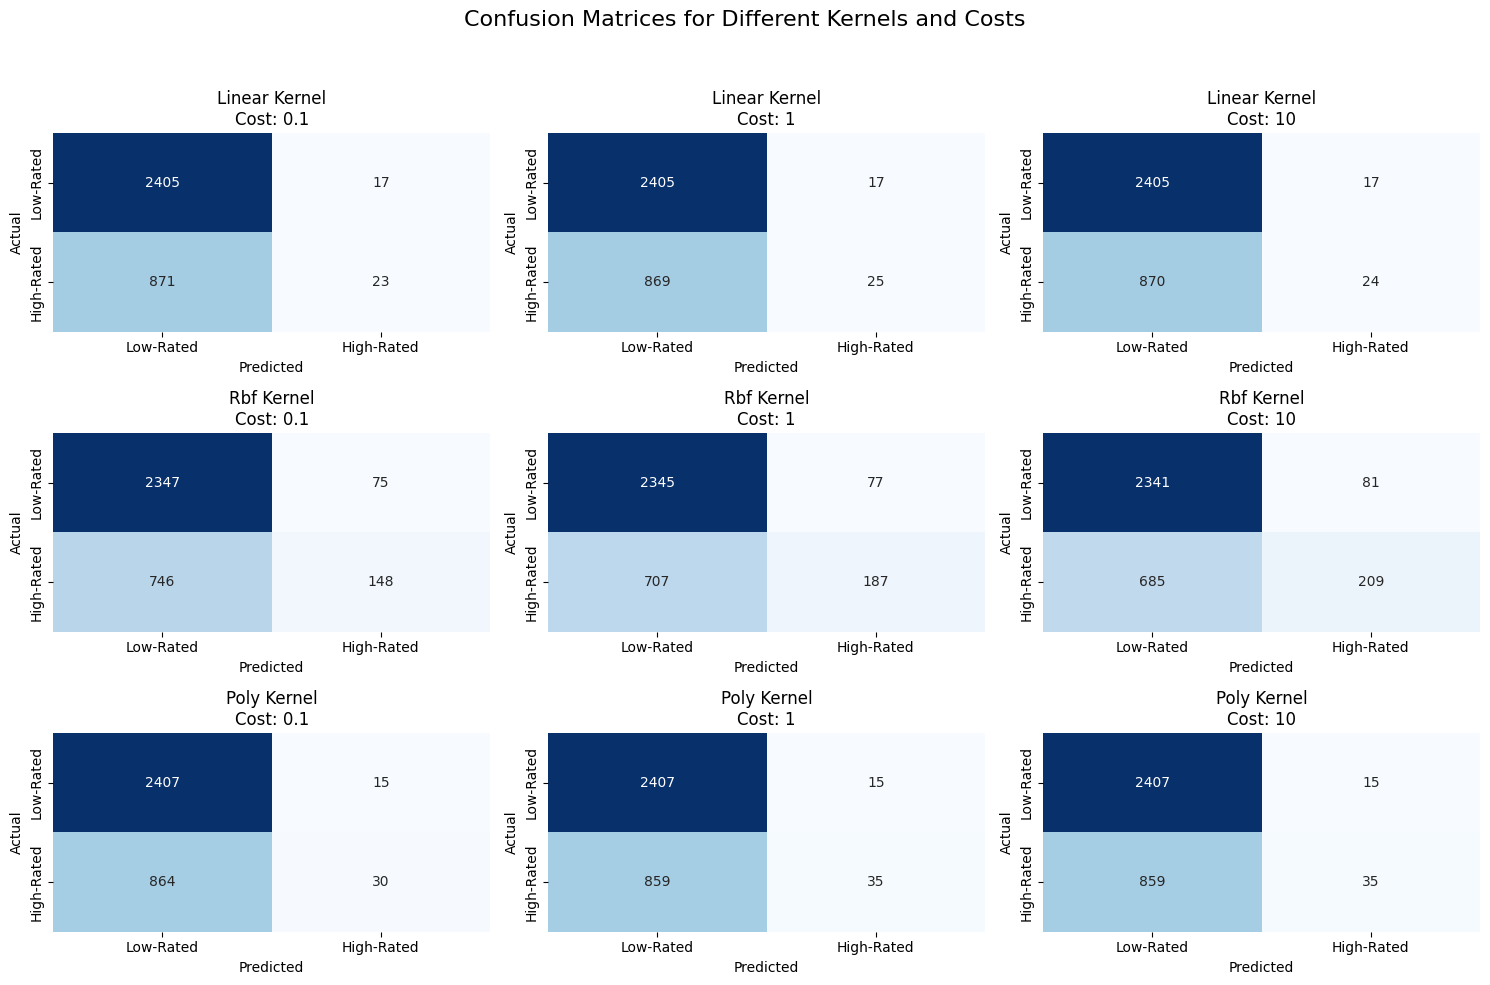


Best Results for Each Kernel:

Kernel: Linear
Best Cost: 1
Accuracy: 0.73
Confusion Matrix:
[[2405   17]
 [ 869   25]]

Kernel: Rbf
Best Cost: 10
Accuracy: 0.77
Confusion Matrix:
[[2341   81]
 [ 685  209]]

Kernel: Poly
Best Cost: 1
Accuracy: 0.74
Confusion Matrix:
[[2407   15]
 [ 859   35]]


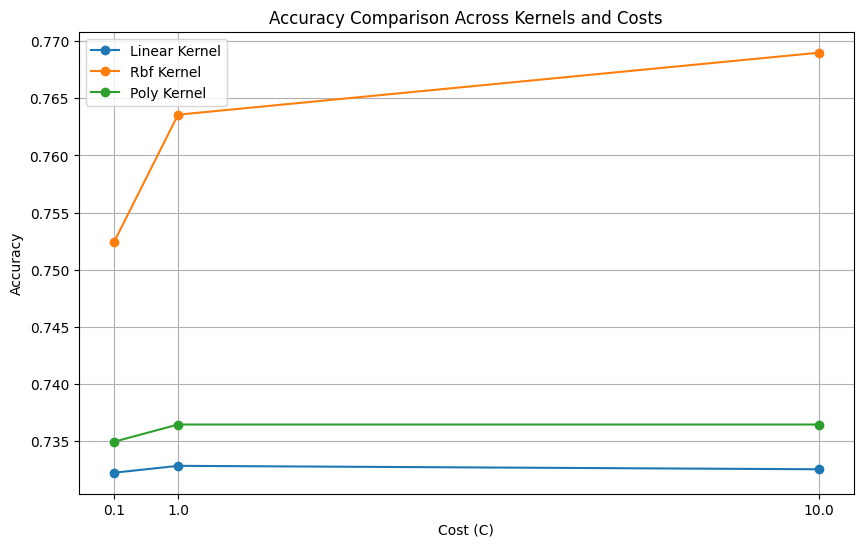

In [15]:
# kernels and costs to evaluate
kernels = ['linear', 'rbf', 'poly']
costs = [0.1, 1, 10]

results = {}

for kernel in kernels:
    for cost in costs:

        svm_model = SVC(kernel=kernel, C=cost, random_state=42)
        svm_model.fit(X_train_scaled, y_train)

        y_pred = svm_model.predict(X_test_scaled)

        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        results[(kernel, cost)] = {
            'accuracy': acc,
            'confusion_matrix': cm,
        }

fig, axes = plt.subplots(len(kernels), len(costs), figsize=(15, 10))
fig.suptitle("Confusion Matrices for Different Kernels and Costs", fontsize=16)

for i, kernel in enumerate(kernels):
    for j, cost in enumerate(costs):
        cm = results[(kernel, cost)]['confusion_matrix']

        sns.heatmap(
            cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            ax=axes[i, j], xticklabels=['Low-Rated', 'High-Rated'], yticklabels=['Low-Rated', 'High-Rated']
        )
        axes[i, j].set_title(f"{kernel.capitalize()} Kernel\nCost: {cost}")
        axes[i, j].set_xlabel("Predicted")
        axes[i, j].set_ylabel("Actual")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

best_results = {}

print("\nBest Results for Each Kernel:")
for kernel in kernels:
    best_cost = max(costs, key=lambda cost: results[(kernel, cost)]['accuracy'])
    best_accuracy = results[(kernel, best_cost)]['accuracy']
    best_cm = results[(kernel, best_cost)]['confusion_matrix']

    best_results[kernel] = {
        'Best Cost': best_cost,
        'Accuracy': best_accuracy,
        'Confusion Matrix': best_cm
    }

    print(f"\nKernel: {kernel.capitalize()}")
    print(f"Best Cost: {best_cost}")
    print(f"Accuracy: {best_accuracy:.2f}")
    print("Confusion Matrix:")
    print(best_cm)

fig, ax = plt.subplots(figsize=(10, 6))
for kernel in kernels:
    accuracies = [results[(kernel, cost)]['accuracy'] for cost in costs]
    ax.plot(costs, accuracies, marker='o', label=f'{kernel.capitalize()} Kernel')

ax.set_title("Accuracy Comparison Across Kernels and Costs")
ax.set_xlabel("Cost (C)")
ax.set_ylabel("Accuracy")
ax.set_xticks(costs)
ax.legend()
plt.grid(True)
plt.show()

# Accuracy vs. Cost Line Chart


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


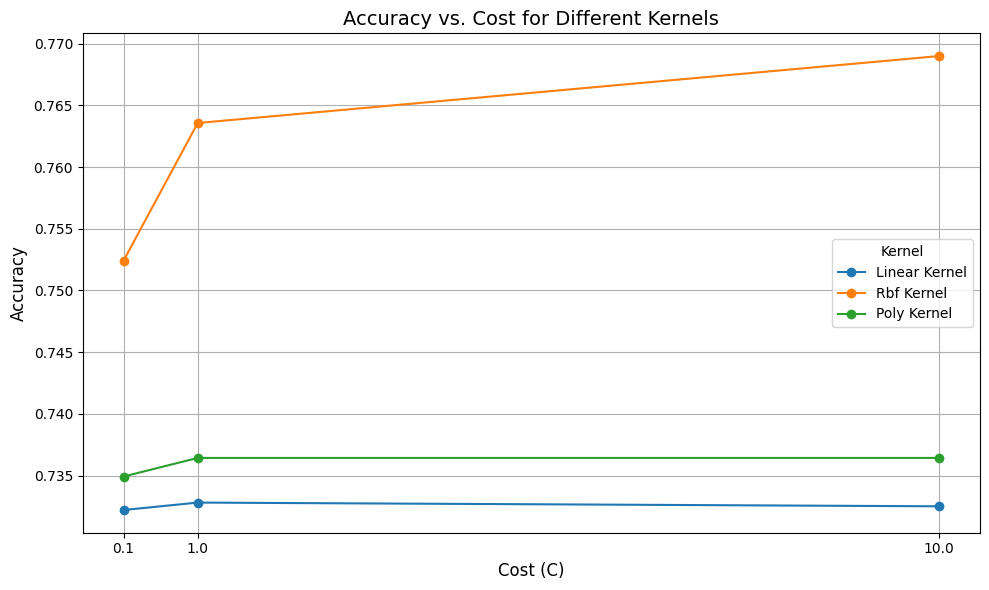

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
for kernel in kernels:

    accuracies = [results[(kernel, cost)]['accuracy'] for cost in costs]
    ax.plot(costs, accuracies, marker='o', label=f'{kernel.capitalize()} Kernel')

ax.set_title("Accuracy vs. Cost for Different Kernels", fontsize=14)
ax.set_xlabel("Cost (C)", fontsize=12)
ax.set_ylabel("Accuracy", fontsize=12)
ax.set_xticks(costs)
ax.legend(title="Kernel", fontsize=10)
ax.grid(True)

plt.tight_layout()
plt.show()

# AdaBoost - Ensemble Learning

In [13]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
median_revenue = df3['revenue'].median()
df3['label'] = (df3['revenue'] >= median_revenue).astype(int)
X = df3[['runtime', 'budget', 'popularity', 'vote_average']]
y = df3['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)
adaboost = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

adaboost.fit(X_train, y_train)

y_pred = adaboost.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("AdaBoost Model Evaluation with New Label (Revenue Classification):")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Model Evaluation with New Label (Revenue Classification):
Accuracy: 0.82

Confusion Matrix:
[[1363  284]
 [ 308 1361]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1647
           1       0.83      0.82      0.82      1669

    accuracy                           0.82      3316
   macro avg       0.82      0.82      0.82      3316
weighted avg       0.82      0.82      0.82      3316



# Confusion Matrix & Line Graph

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Optimized AdaBoost Model Evaluation:
Accuracy: 0.82

Confusion Matrix:
[[1353  294]
 [ 296 1373]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1647
           1       0.82      0.82      0.82      1669

    accuracy                           0.82      3316
   macro avg       0.82      0.82      0.82      3316
weighted avg       0.82      0.82      0.82      3316



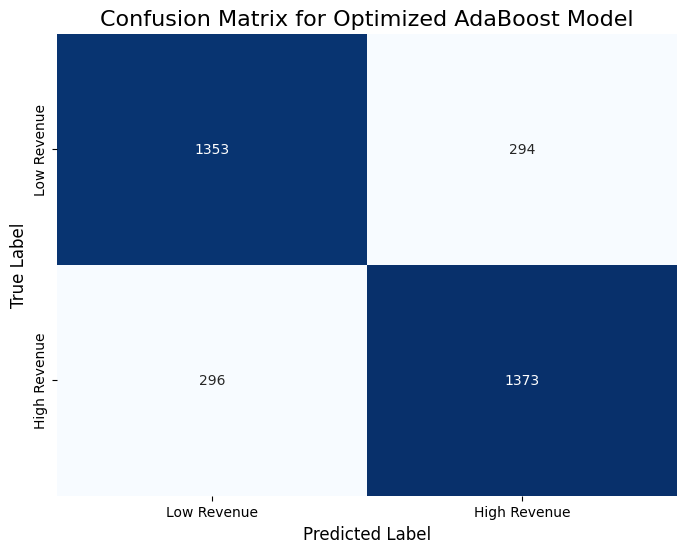

<ipython-input-14-f1f3866168ae>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette='viridis')


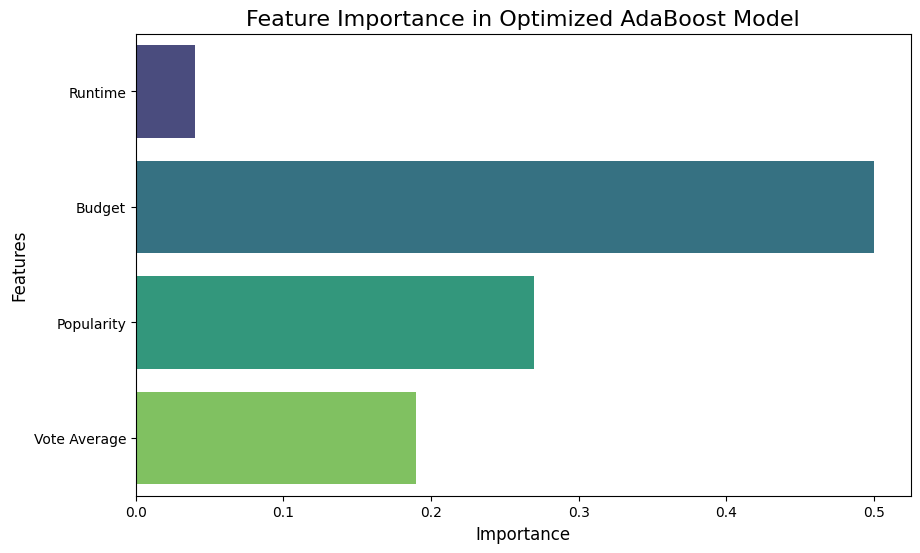

In [14]:
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)
adaboost = AdaBoostClassifier(estimator=base_estimator, random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}
# Hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

optimized_adaboost = grid_search.best_estimator_
y_pred = optimized_adaboost.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Optimized AdaBoost Model Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Low Revenue', 'High Revenue'],
            yticklabels=['Low Revenue', 'High Revenue'])
plt.title("Confusion Matrix for Optimized AdaBoost Model", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()

feature_importances = optimized_adaboost.feature_importances_
features = ['Runtime', 'Budget', 'Popularity', 'Vote Average']

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette='viridis')
plt.title("Feature Importance in Optimized AdaBoost Model", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.show()